In [50]:
import warnings 
warnings.filterwarnings('ignore')

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Dataset
In the below cell, we use pandas to load the datasets, Training Data and Testing Data into two separate dataframes **df** and **df_test**.

In [3]:
df = pd.read_csv('Training_Data.csv')                   # Loading the Training Data
df_test = pd.read_csv('Testing_Data.csv')               # Loading the Testing Data
key_series = df_test['key']                             # Storing the 'key' column in a variable

## Information about Training DataFrame
This cell displays the basic information about Training DataFrame including the index dtype and columns, non-null values and memory usage.

In [4]:
df.info()                                                # Basic information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             4170 non-null   int64  
 1   age             4170 non-null   int64  
 2   job             4170 non-null   object 
 3   marital         4170 non-null   object 
 4   education       4170 non-null   object 
 5   default         4170 non-null   object 
 6   housing         4170 non-null   object 
 7   loan            4170 non-null   object 
 8   contact         4170 non-null   object 
 9   month           4170 non-null   object 
 10  day_of_week     4170 non-null   object 
 11  duration        4170 non-null   int64  
 12  campaign        4170 non-null   int64  
 13  pdays           4170 non-null   int64  
 14  previous        4170 non-null   int64  
 15  poutcome        4170 non-null   object 
 16  emp.var.rate    4170 non-null   float64
 17  cons.price.idx  4170 non-null   f

## Statistical Information about Training Dataframe
We analyse the training dataframe by calculating some statistical data like percentile, mean and std of the numerical values of our Training Dataframe and its numerical Series.

In [5]:
df.describe()                                       # Statistical Information about the dataframe

,key,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.00000,4170.000000,4170.000000,4170.000000,4170.000000
mean,11331.129017,40.593525,241.794724,3.172182,998.283933,0.010791,1.24036,94.106115,-39.512062,4.891786,5216.991391
std,6379.833856,9.040195,271.674309,3.975349,26.690518,0.103332,0.35196,0.436128,2.733001,0.177018,16.734936
min,444.000000,20.000000,4.000000,1.000000,3.000000,0.000000,-0.10000,93.200000,-42.000000,4.191000,5191.000000
25%,4407.250000,33.000000,86.000000,1.000000,999.000000,0.000000,1.10000,93.994000,-41.800000,4.858000,5191.000000
50%,10769.500000,39.000000,157.000000,2.000000,999.000000,0.000000,1.40000,94.465000,-41.800000,4.959000,5228.100000
75%,11811.750000,47.000000,294.000000,3.000000,999.000000,0.000000,1.40000,94.465000,-36.400000,4.961000,5228.100000
max,24452.000000,60.000000,3078.000000,56.000000,999.000000,1.000000,1.40000,94.465000,-36.100000,4.966000,5228.100000


## NULL values analysis
We analyse how many null values are there in our Training dataframe. Dealing with null values is an important step in data cleaning pipeline in data analysis to ensure smooth and faster data processing.

In [7]:
df.isnull().sum()                                       # NULL values in each series of our dataframe

key               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values in the dataset. So we don't need to handle missing datas for our training dataset.

In [8]:
df.head()                                                  # Displaying the fisrt five rows of the dataset.

,key,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,444,45,management,married,university.degree,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,445,34,admin.,married,basic.9y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,446,47,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,447,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,448,57,technician,married,basic.4y,unknown,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In the next cells we analyse the number of classes and number of datapoints belonging to each class of three Series - 
**job**, **marital** and **education**.

In [9]:
df['job'].value_counts()                                  # Displaying the values in each category of Series 'job'

blue-collar      1059
admin.            962
technician        701
services          411
management        328
entrepreneur      178
self-employed     142
housemaid         112
retired           111
unemployed         95
unknown            37
student            34
Name: job, dtype: int64

In [10]:
df['marital'].value_counts()                               # Displaying the values in each category of Series 'marital'

married     2786
single       906
divorced     465
unknown       13
Name: marital, dtype: int64

In [11]:
df['education'].value_counts()                              # Displaying the values in each category of Series 'education'

university.degree      1129
high.school             930
basic.9y                671
professional.course     531
basic.4y                489
basic.6y                247
unknown                 173
Name: education, dtype: int64

## Distribution of output y
We analyse how many data points correspond to y value 'no' and how many data points correspond to the y value 'yes' in our training dataset.

In [12]:
df['y'].value_counts()                                      # Tradeoff between 'yes' and 'no' category in our output

no     3985
yes     185
Name: y, dtype: int64

From this we confirm that our dataset in imbalance. As the number of 'no' values > number of 'yes' values.

In [13]:
df.shape                                                   # Shape of our training dataset

(4170, 22)

## Input Features and Output Series
We separate the input features from our dataset, that we use for training our model and store it in dataframe 'X' and the output variable in a separate Series 'Y'.

In [15]:
Y = df['y']                                                # Output Series
X = df.drop(['y','key'],axis = 1)                          # Input features


We also remove the key feature from our input features because key does not give any numerical information significant to modell training about our dataframe and hence should not be used in training.

## Visualization and Data Analysis
### Distribution of Output Series y

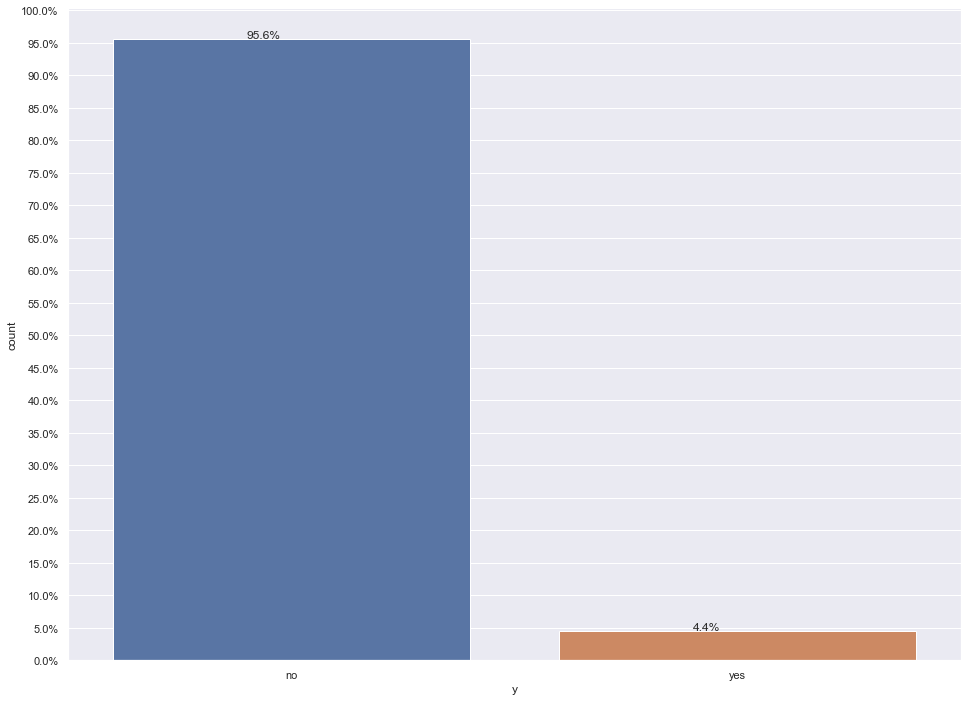

In [16]:
# We make a count plot of number of y variable that are 'no' and number of y variables that are 'yes' as a percentage of total.

sns.set()                                                            # Setting the style of plot using seaborn.
plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
total = len(Y)*1.                                                    # Total number of y counts
ax=sns.countplot(x="y", data=df)                                     # Count plot                                    

# Annotate the percentage of y variable corresponding to 'yes' and 'no' in our dataset.
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+7))

ax.yaxis.set_ticks(np.linspace(0, total, 21))

# Change the ticklabel to the desired format while keeping the ticks in place.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels())
  
plt.show()

## Univariate Data Analysis
 
We define two functions **count** and **countY**, that plots the count of the label passed as argument as a percentage of total count and the count of the label for different 'yes' and 'no' values of Y respectively.

In [17]:
def count(label, data):
    plt.figure(figsize=(16,12))                          # Setting the size of the figure using pyplot.
    Y = df[label]                                        # Series which is used for analysis
    total = len(Y)*1.                                    # Total number of values in the Series
    ax=sns.countplot(x=label, data=data)                 # Count plot
    
    # Annotate the percentage of a particular category in the series
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+7))
        
    ax.yaxis.set_ticks(np.linspace(0, total, 21))
    
    # Change the ticklabel to the desired format while keeping the ticks in place.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels())
    
    plt.show()

In [19]:
def countY(label, data):
    plt.figure(figsize=(20,10))                           # Setting the size of the figure using pyplot.
    Y = df[label]                                         # Series which is used for analysis
    total = len(Y)*1.                                     # Total number of values in the Series
    ax=sns.countplot(x=label, data=data, hue="y")         # Count plot for different categories of Series with respect to 'y'
    
    # Annotate the percentage of a particular category in the series
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+7))
        
    ax.yaxis.set_ticks(np.linspace(0, total, 21))
    
     # Change the ticklabel to the desired format while keeping the ticks in place.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels())
    
    plt.show()

## Categorical Feature : Job
### Count plot of Job

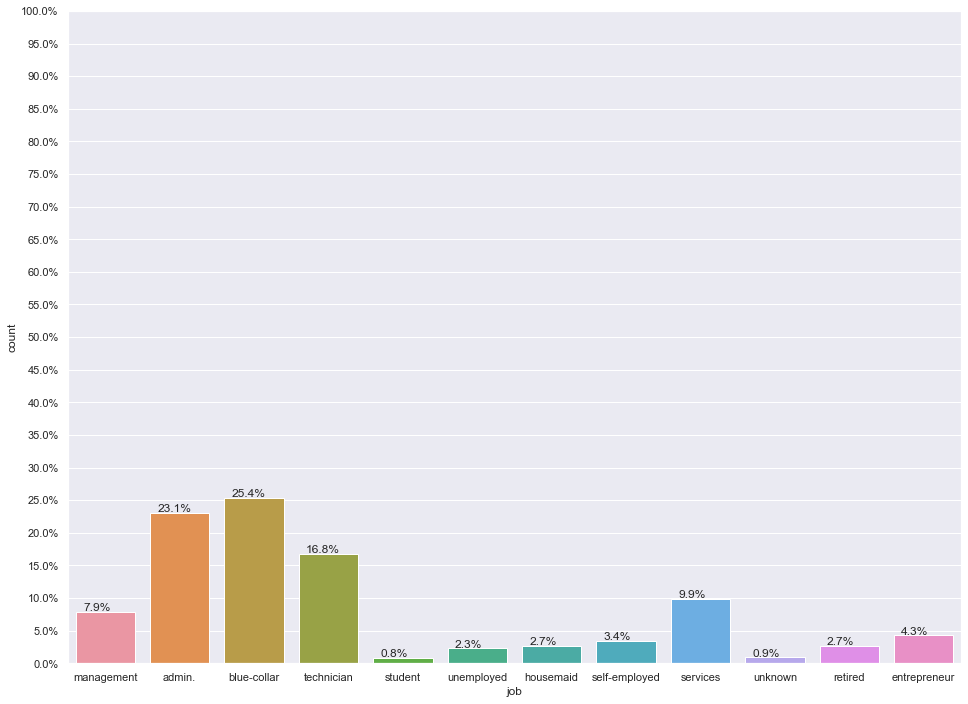

In [20]:
count('job',df)

We can see from the above distribution that the majority of clients work as "admins," "blue-collar workers," or "technicians." 

### Count plot of Job with different y labels

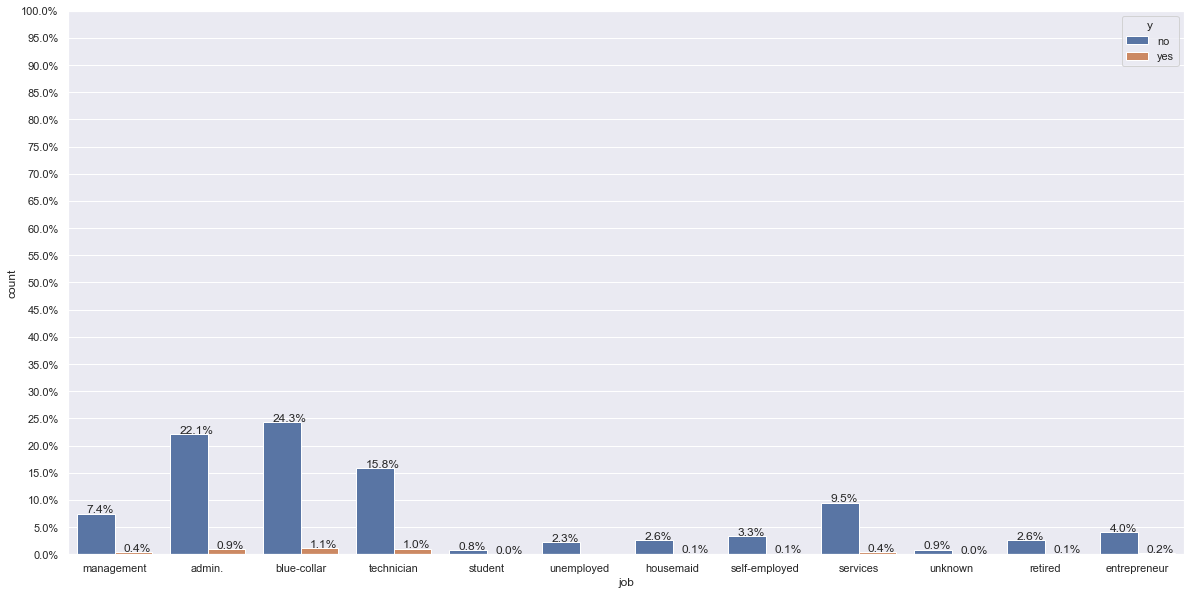

In [21]:
countY('job',df)

Customers who work in blue collar jobs have the highest rate of subscribing to a term deposit, but they also have the highest rate of not subscribing, as shown in the graph above. This is due to the fact that we have more customers who work as blue collar than any other occupation.

## Categorical Feature : Marital
### Count plot of marital

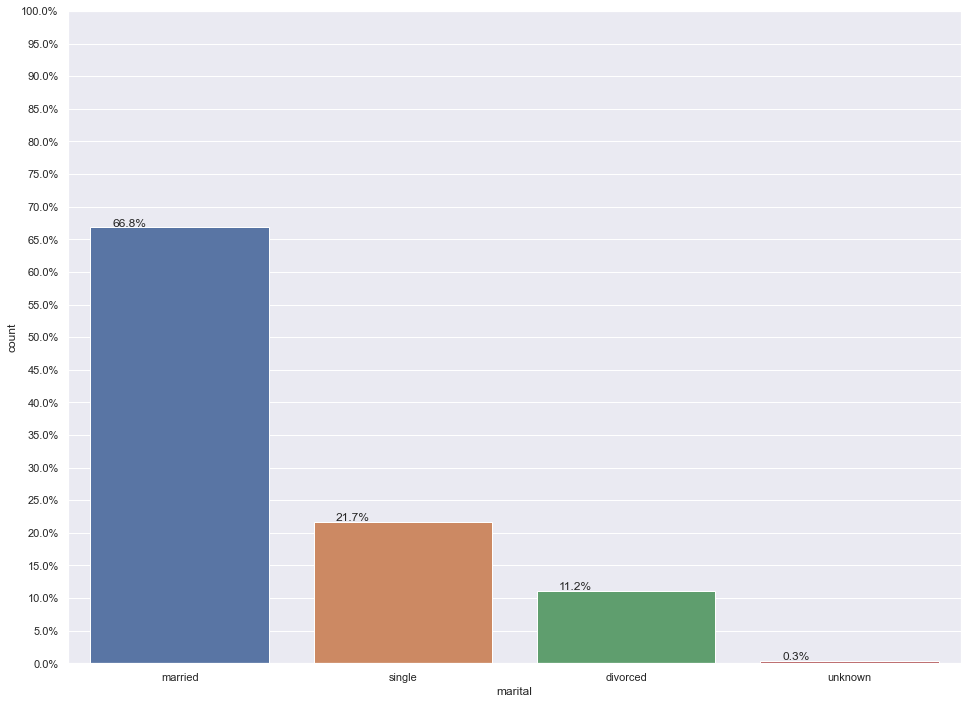

In [27]:
count('marital',df)

### Count plot of marital with different y labels

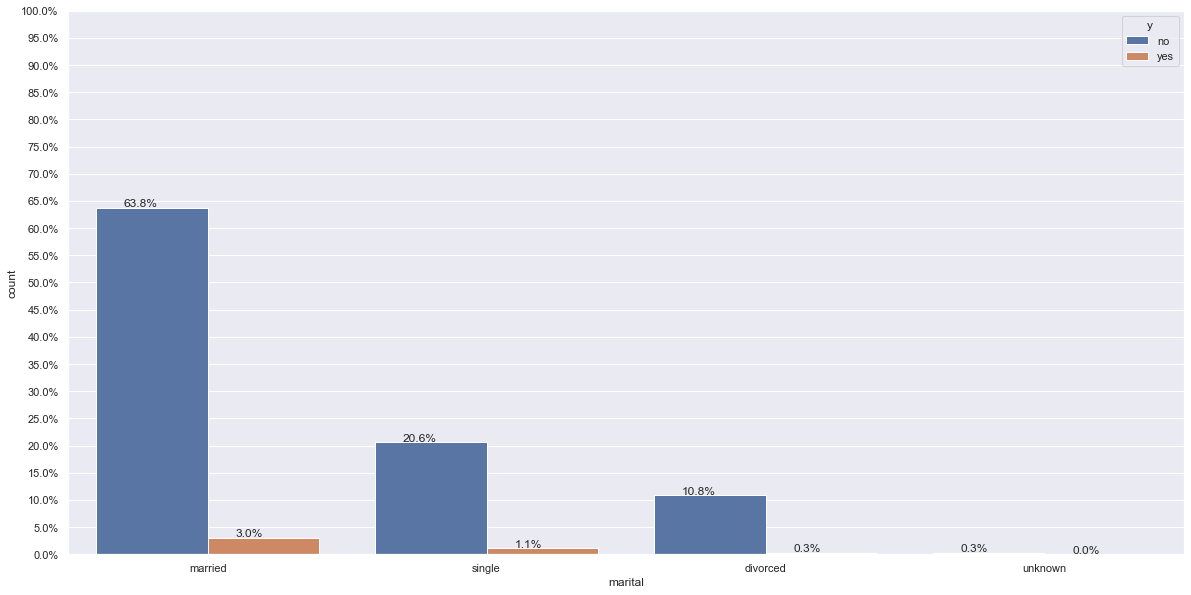

In [23]:
countY('marital',df)

## Categorical Feature : Education
### Count plot of education

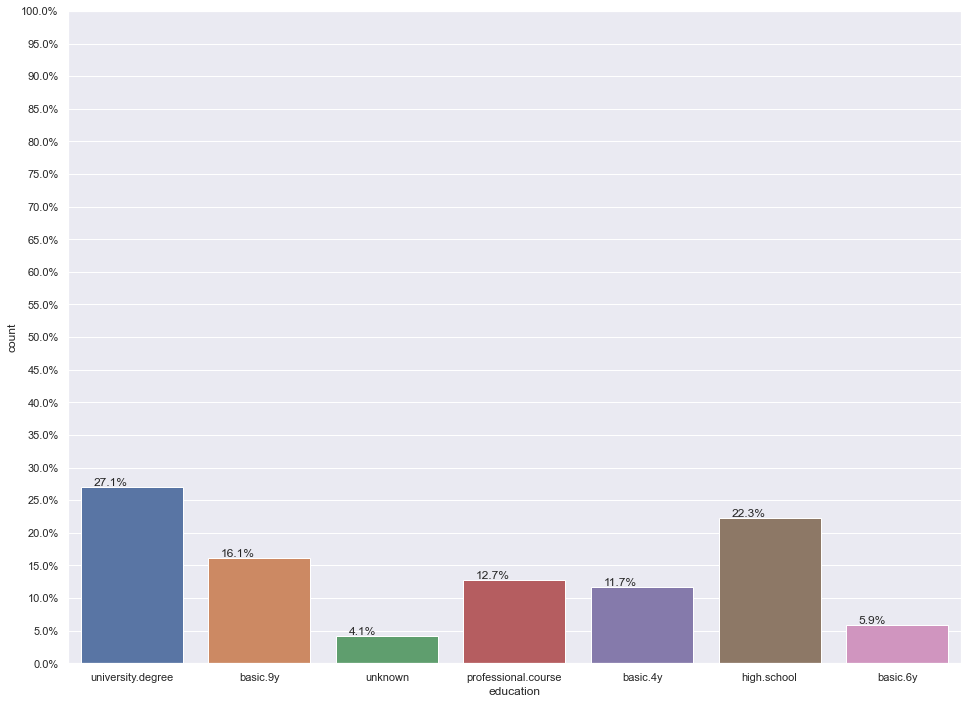

In [29]:
count('education',df)

### Count plot of education with different y labels

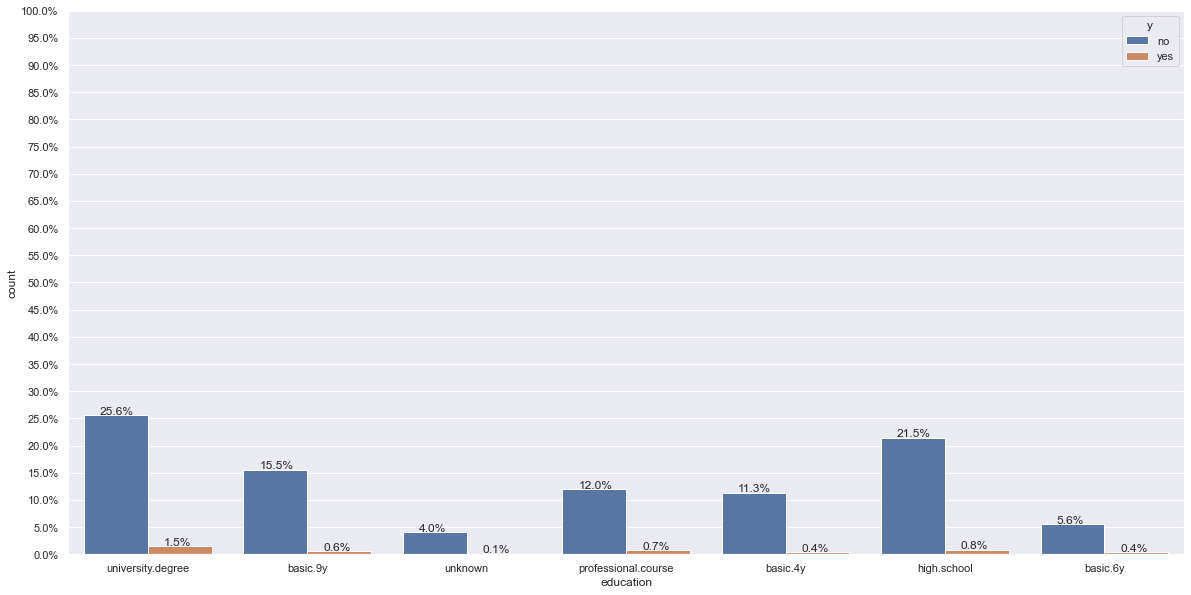

In [30]:
countY('education',df)

## Categorical Feature : Default
### Count plot of default

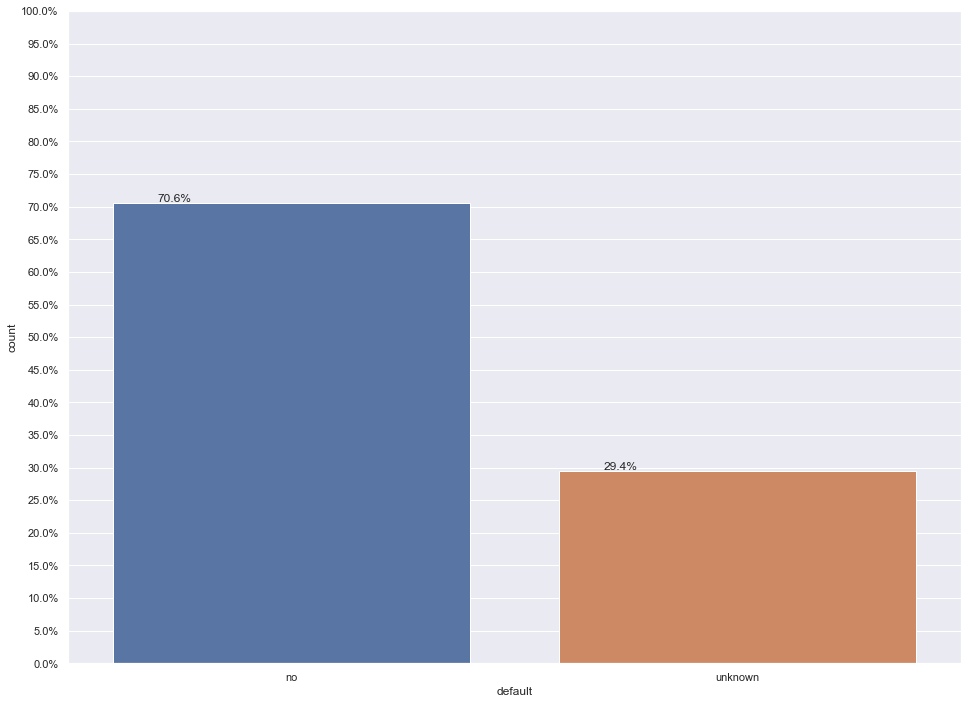

In [33]:
count('default',df)

### Count plot of default with different y labels

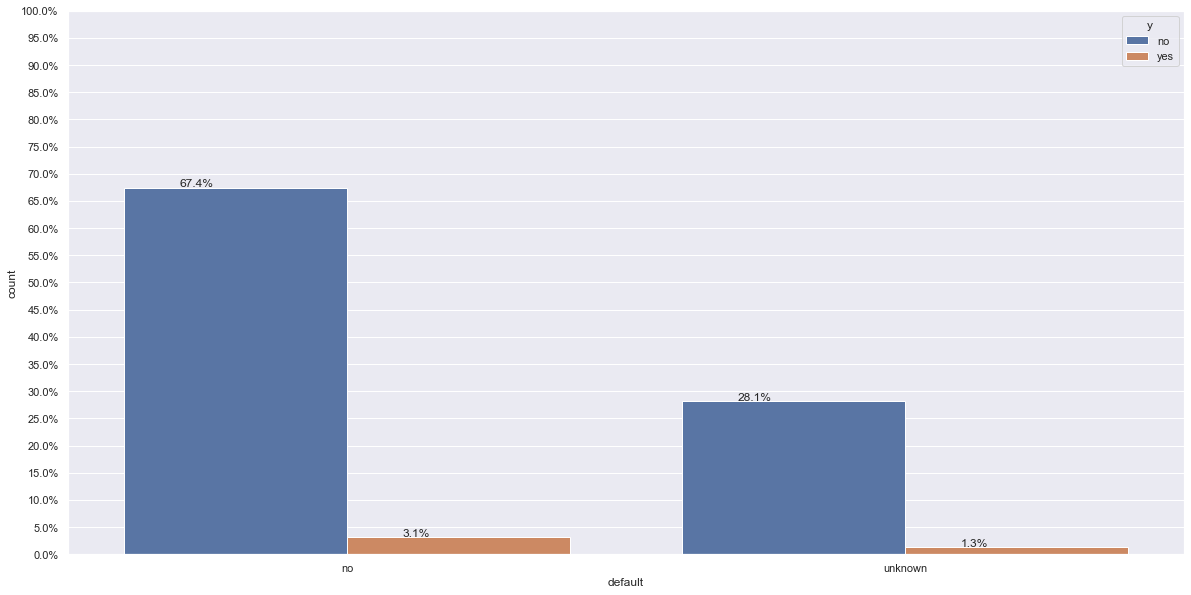

In [32]:
countY('default',df)

## Categorical Feature : Housing
### Count plot of housing

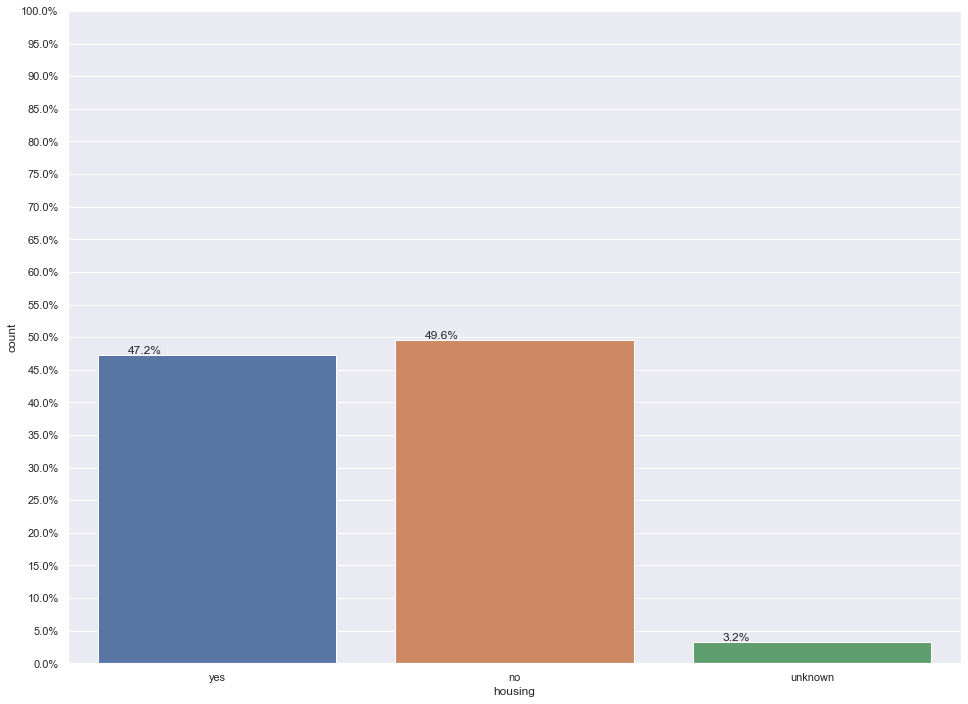

In [34]:
count('housing',df)

### Count plot of housing with different y labels

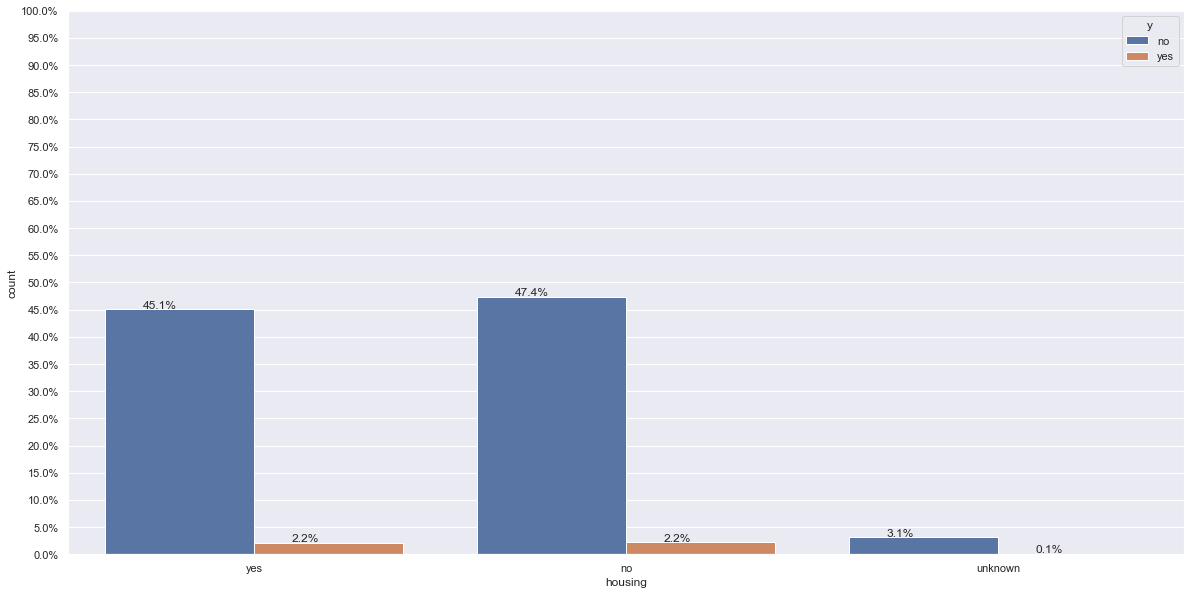

In [36]:
countY('housing',df)

## Categorical Feature : Loan
### Count plot of loan

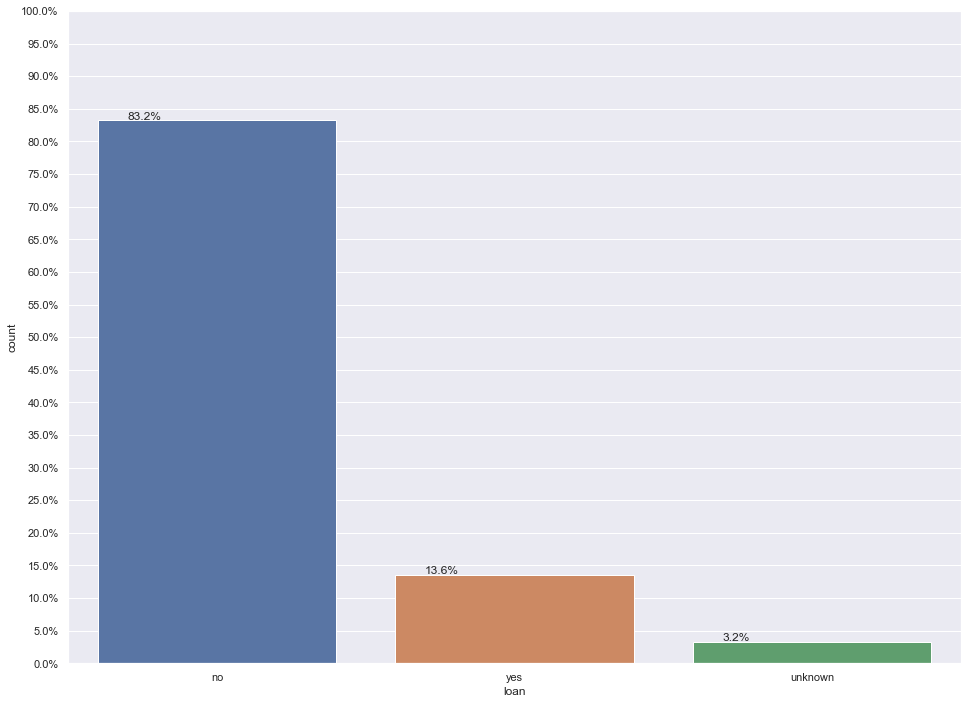

In [37]:
count('loan',df)

### Count plot of loan with different y labels

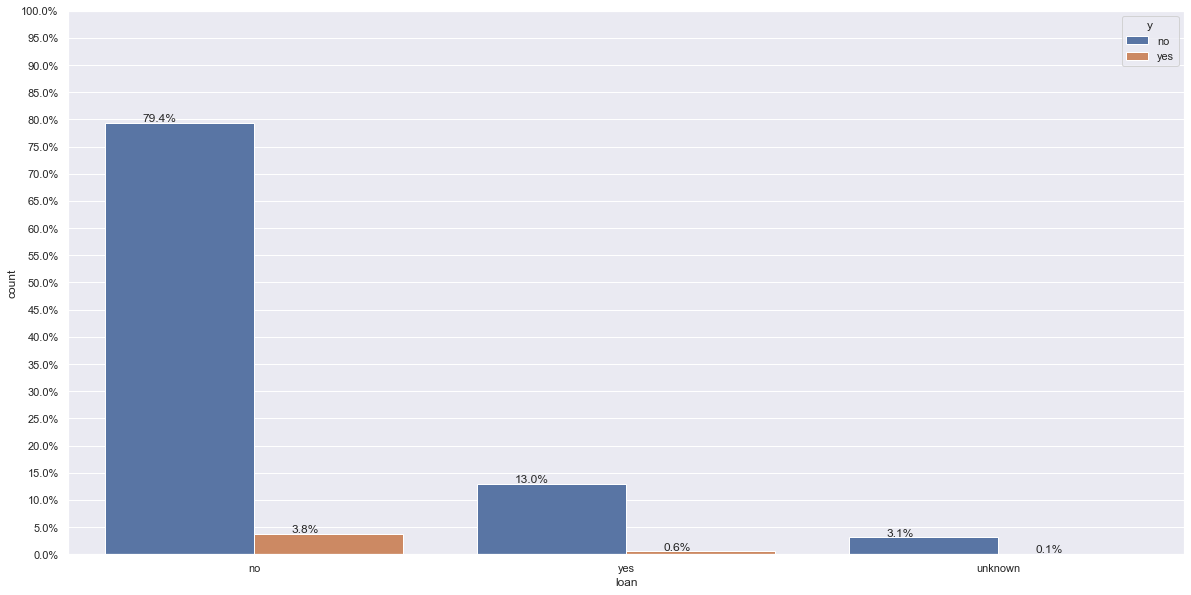

In [39]:
countY('loan',df)

## Categorical Feature : Contact
###  Count plot of contact

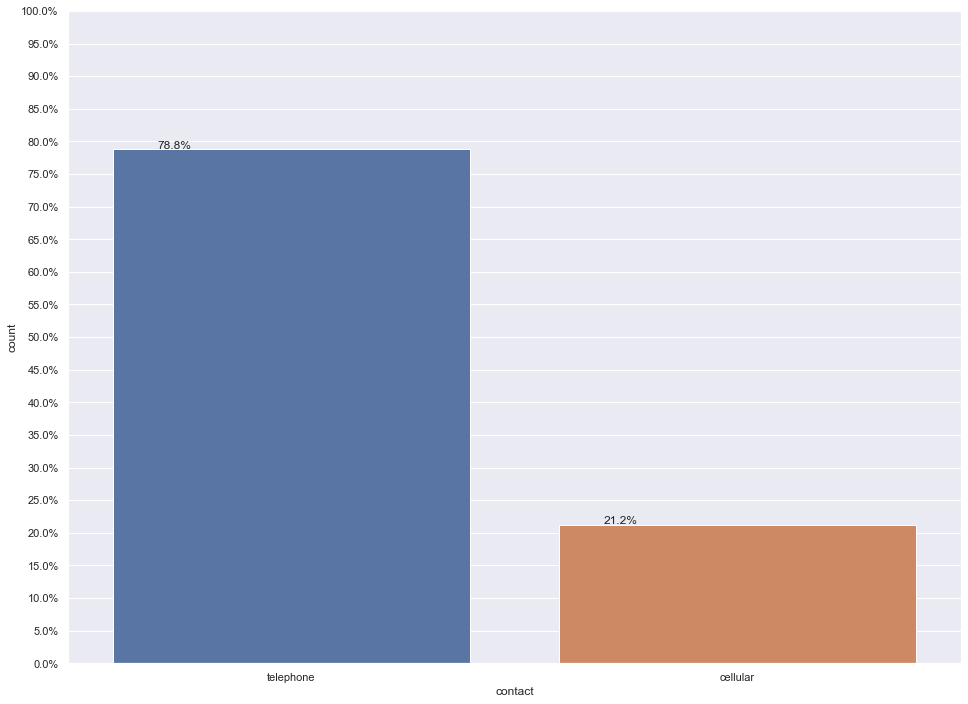

In [41]:
count('contact',df)

### Count plot of contact with different y labels

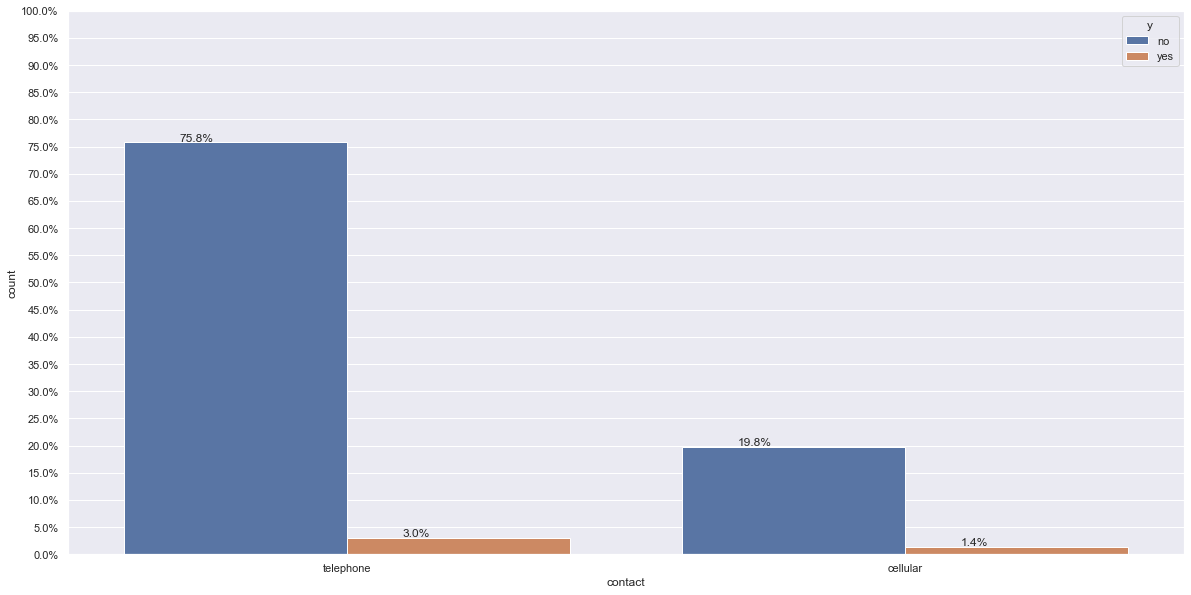

In [40]:
countY('contact',df)

## Categorical Feature : Month
### Count plot of month

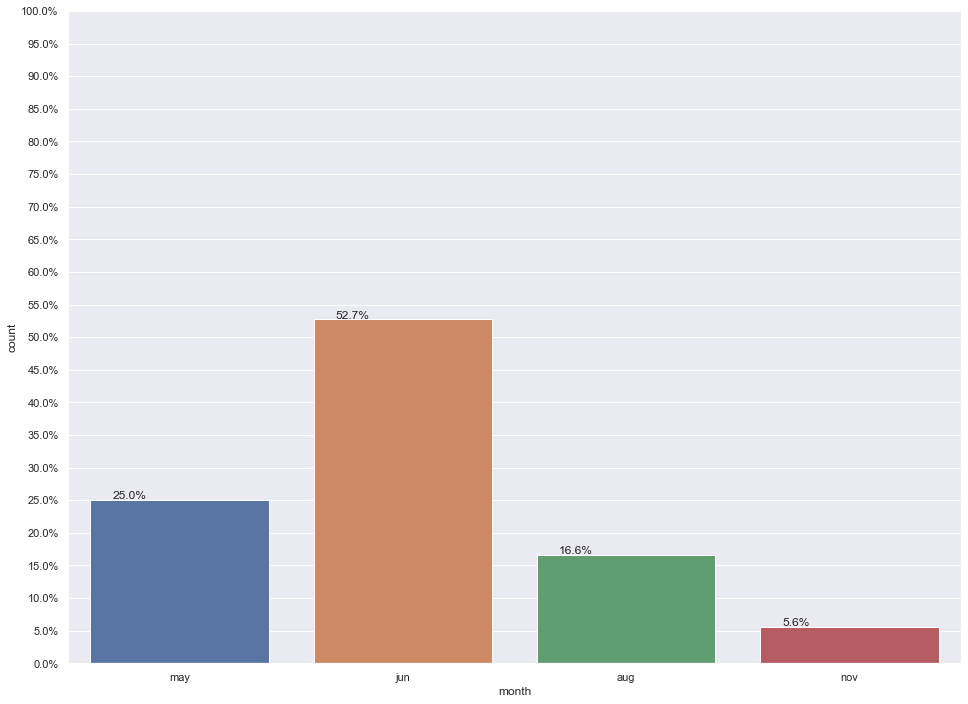

In [42]:
count('month',df)

### Count plot of month with different y labels

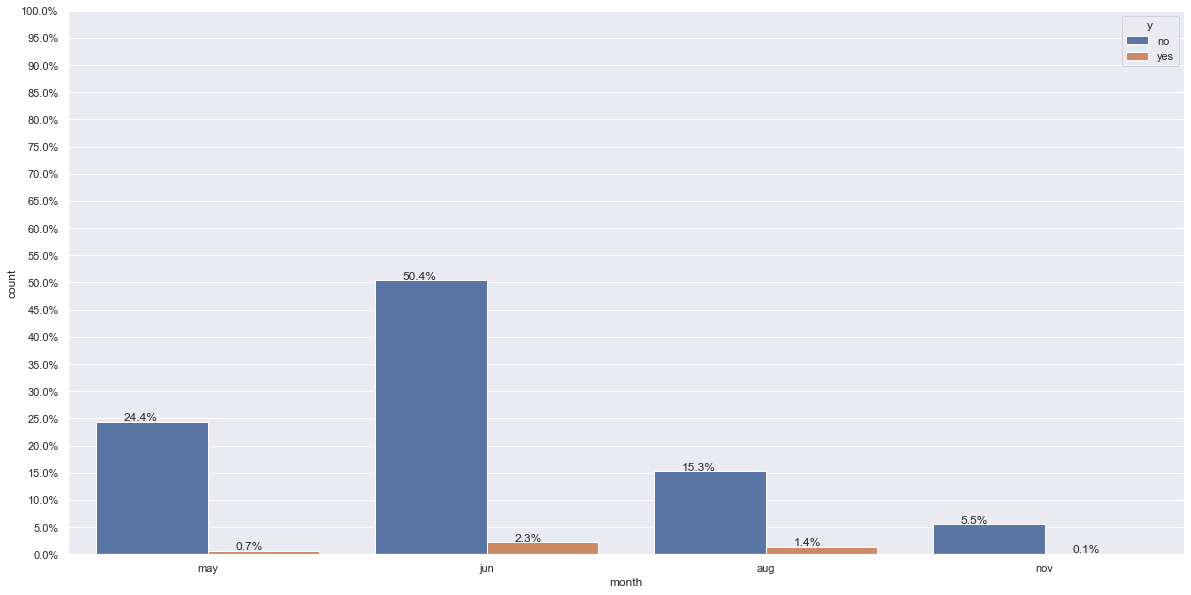

In [43]:
countY('month',df)

## Categorical Feature : Day of the week
### Count plot of day of week

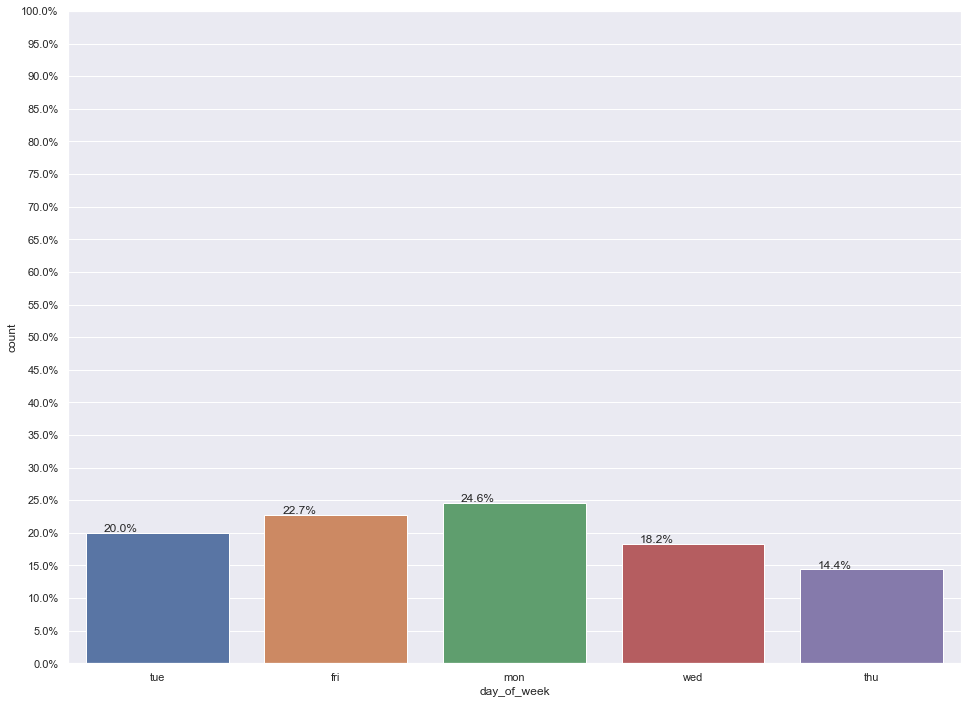

In [44]:
count('day_of_week',df)

### Count plot of day of week with different y labels

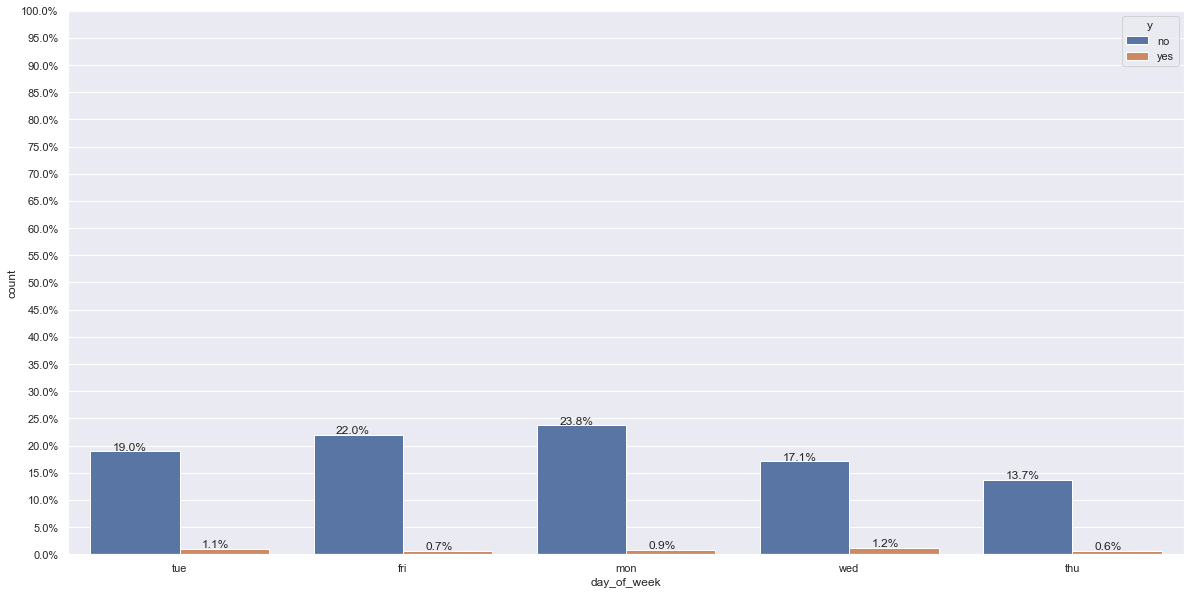

In [49]:
countY('day_of_week',df)

We see that we get nearly the same count plot for each of the categories of the day of week series

## Categorical Feature : Poutcome
### Count plot of poutcome

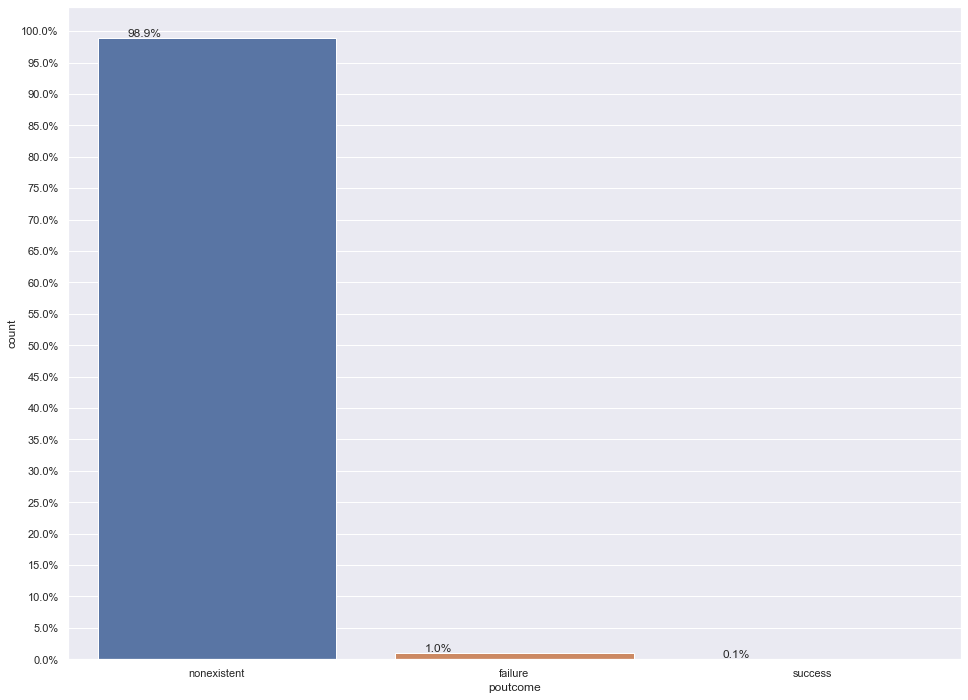

In [46]:
count('poutcome',df)

### Count plot of poutcome with different y labels

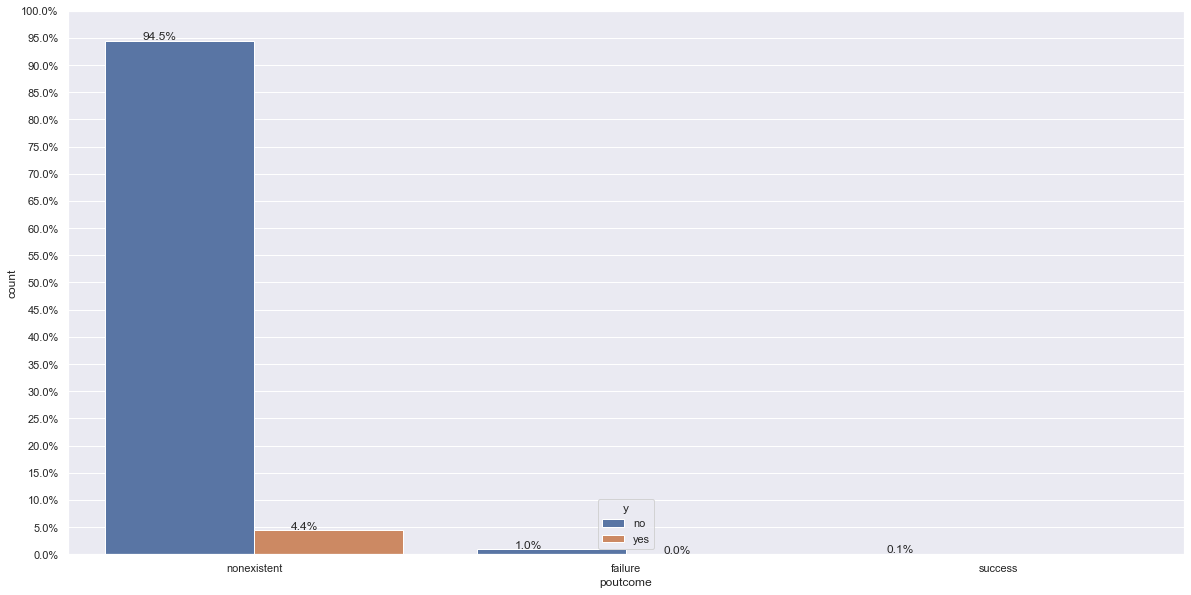

In [48]:
countY('poutcome',df)

## Numerical Feature : Age
### Box plot of age

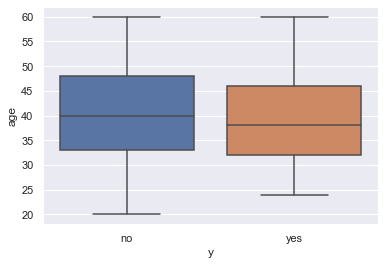

In [51]:
sns.boxplot(data=df, x="y", y="age")
plt.show()

According to the following boxplot, the median age of consumers who subscribed or did not subscribe to a term deposit is roughly 37-41. And the boxplots for both classes overlap quite a bit, indicating that age isn't always a reliable predictor of which customers would subscribe and which will not.

### Distplot of age
Distpot determines the data distribution of our univariable age against the density distribution with histogram and KDE.

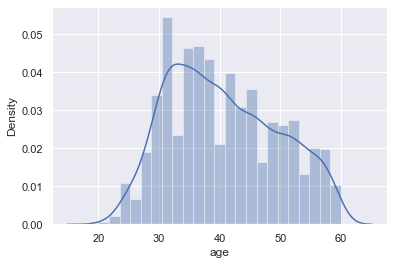

In [52]:
sns.distplot(df['age'])
plt.show()

## Numerical Feature : Duration
### Box plot of duration

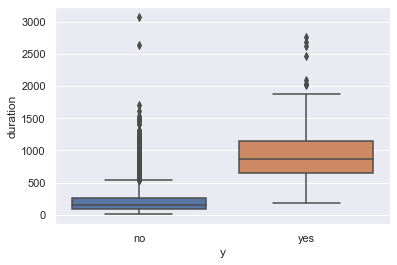

In [53]:
sns.boxplot(data=df, x="y", y="duration")
plt.show()

From the above box plot it is clear that duration is an important feature to predict target variable.

### distplot of duration

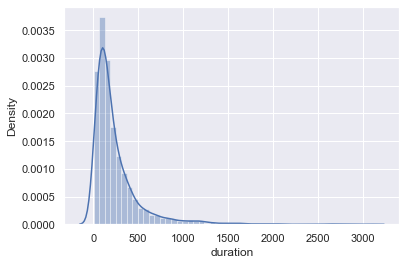

In [55]:
sns.distplot(df['duration'])
plt.show()

Most of the values are between 0-500 and very few values are high, >500

## Numerical Feature : Campaign
### Box plot of campaign

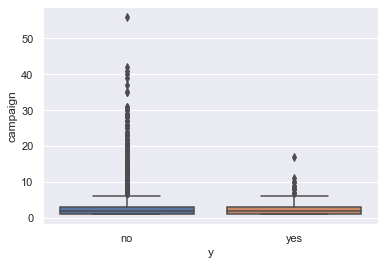

In [56]:
sns.boxplot(data=df, x="y", y="campaign")
plt.show()

### distplot of campaign

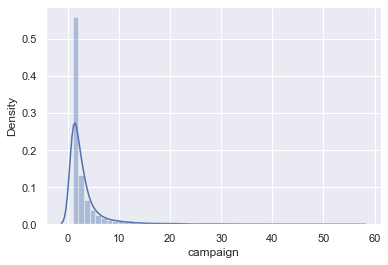

In [57]:
sns.distplot(df['campaign'])
plt.show()

## Numerical Feature : Pdays

In [58]:
df['pdays'].unique()                              # Unique values in pdays

array([999,   4,   3], dtype=int64)

In [59]:
df['pdays'].value_counts()                        # count of each unique value

999    4167
4         2
3         1
Name: pdays, dtype: int64

### Box plot of pdays

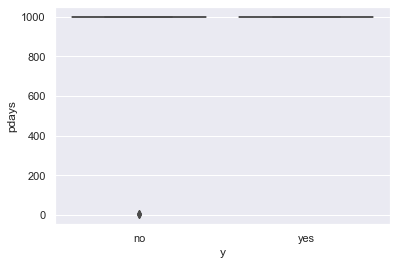

In [60]:
sns.boxplot(data=df, x="y", y="pdays")
plt.show()

Most of the customers have not been contacted before as most of the values are 999

### distplot of pdays with output variable y = yes

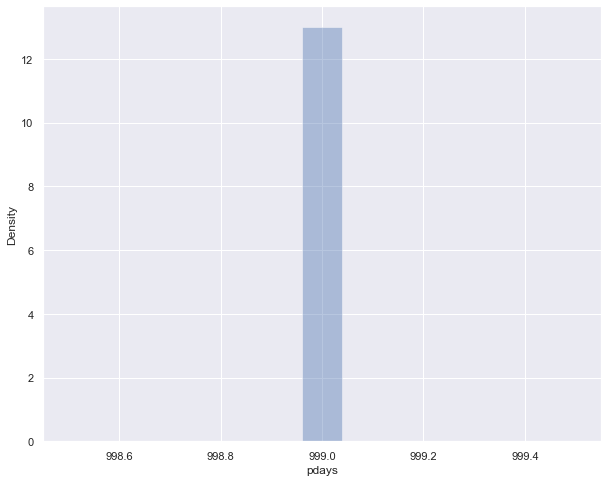

In [61]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df[df["y"]=="yes"]["pdays"])
plt.show()

### distplot of pdays with output variable y = no

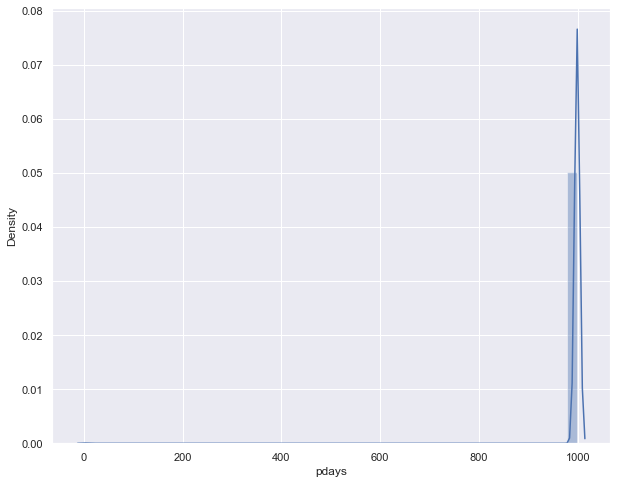

In [62]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df[df["y"]=="no"]["pdays"])
plt.show()

This shows that all the customera who have been contacted before have disagreed for term deposit along with most of the customers who have not been contacted before. Very few of the customers who have not been contacted before agreed for term deposit.

## Numerical Feature : previous

In [64]:
df["previous"].unique()                             # unique values in previous

array([0, 1], dtype=int64)

In [65]:
df["previous"].value_counts()                       # count of unique values

0    4125
1      45
Name: previous, dtype: int64

### Box plot of previous

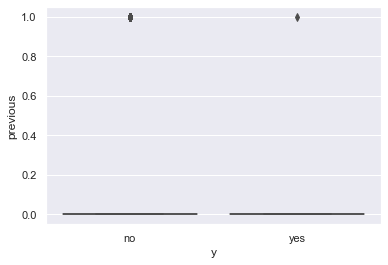

In [67]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="previous")
plt.show()

### distplot of previous

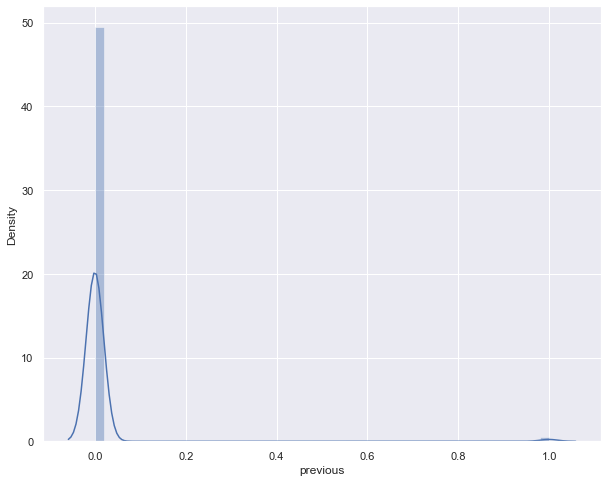

In [68]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df["previous"])
plt.show()

### distplot of previous for target yes and no

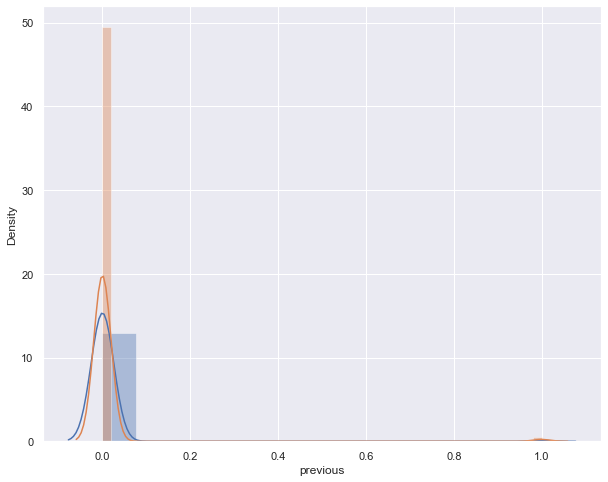

In [69]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df[df["y"]=="yes"]["previous"])
sns.distplot(df[df["y"]=="no"]["previous"])
plt.show()

distplot is very similarly distributed for both the target variables **yes** and **no**. Hence, we also analyse by making count plot.

### count plot of previous

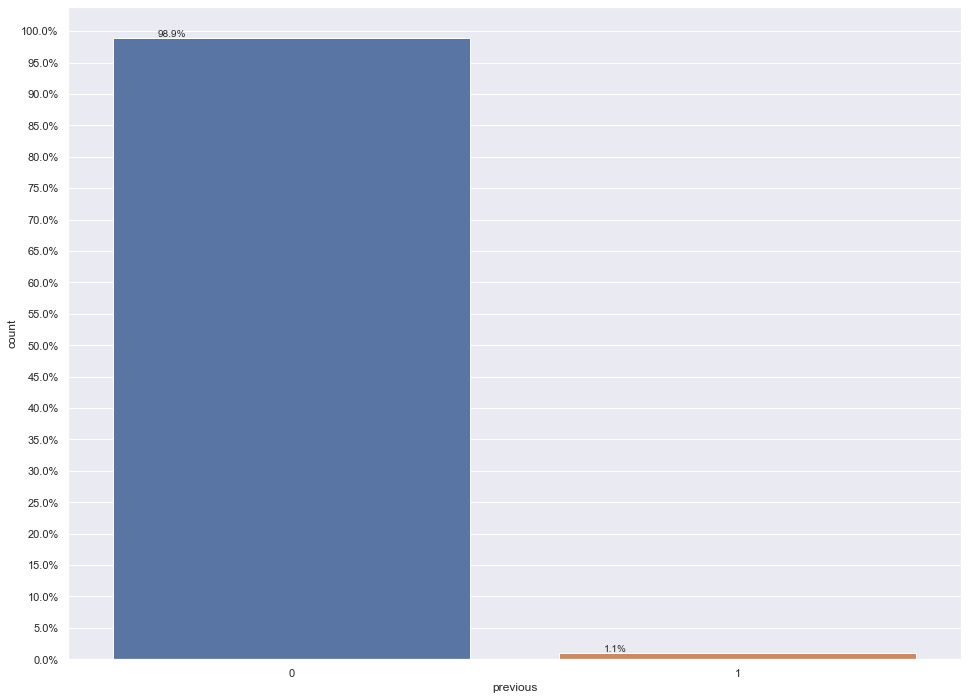

In [70]:
count('previous',df)

### Count plot of previous with different y labels

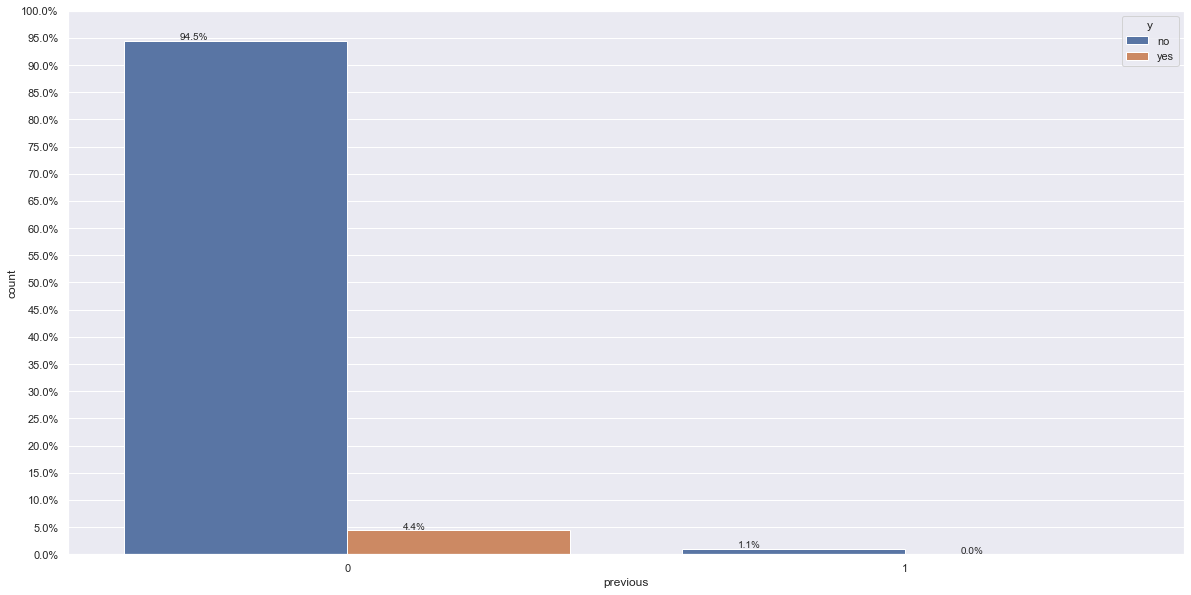

In [71]:
countY('previous',df)

## Numerical feature : emp.var.rate

In [72]:
df["emp.var.rate"].value_counts()                     # count of values in emp.var.rate

 1.4    2891
 1.1    1044
-0.1     235
Name: emp.var.rate, dtype: int64

### Box plot of emp.var.rate

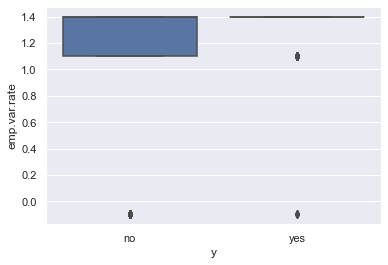

In [74]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="emp.var.rate")
plt.show()

### distplot of emp.var.rate

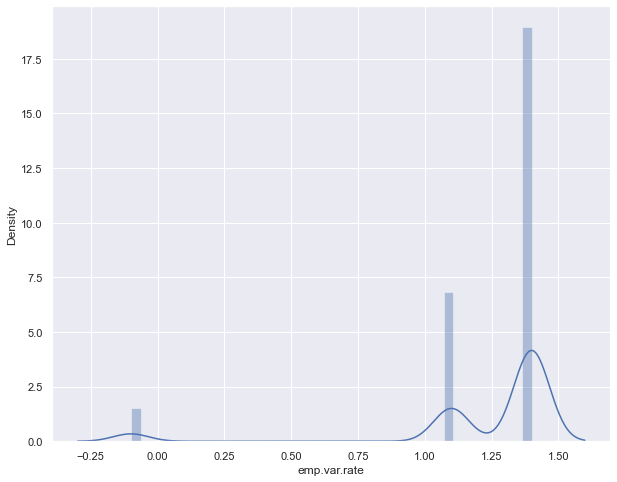

In [75]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df["emp.var.rate"])
plt.show()

## Numerical Feature : cons.price.idx
### Boxplot of cons.price.idx

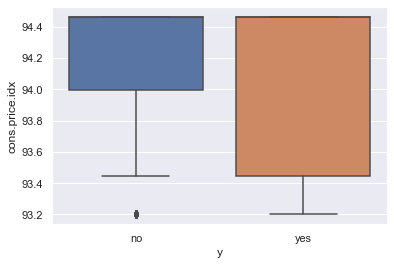

In [76]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="cons.price.idx")
plt.show()

### distplot of cons.price.idx

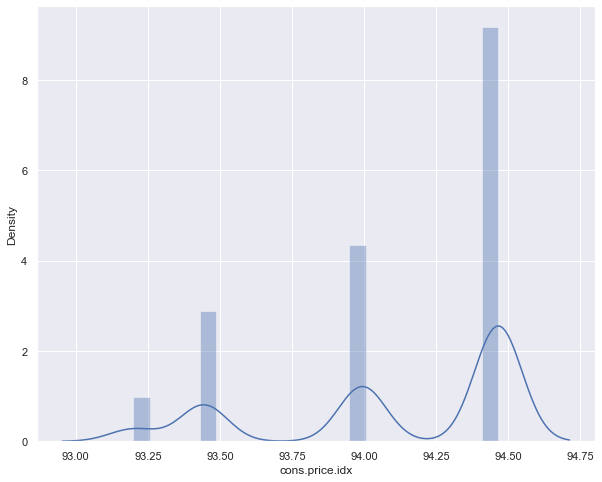

In [77]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df["cons.price.idx"])
plt.show()

### Box plot of cons.conf.idx

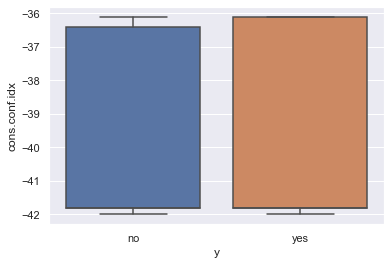

In [78]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="cons.conf.idx")
plt.show()

### distplot of cons.conf.idx

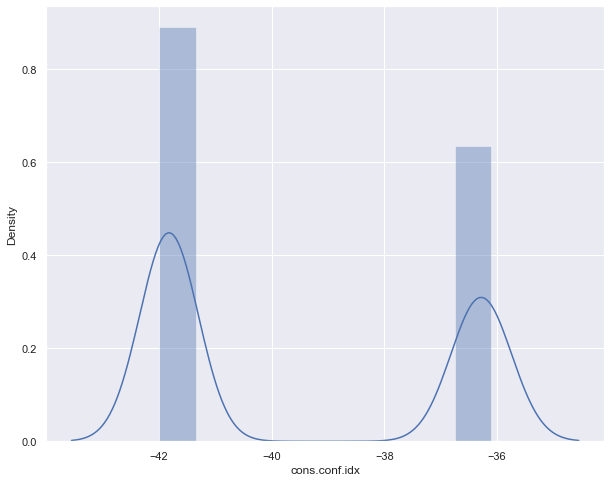

In [79]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df["cons.conf.idx"])
plt.show()

## Numerical Feature : euribor3m

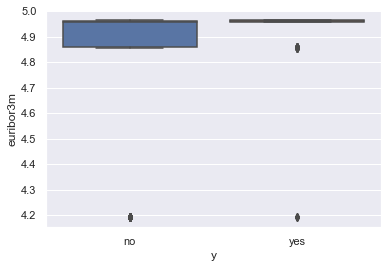

In [80]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="euribor3m")
plt.show()

### distplot of euribor3m

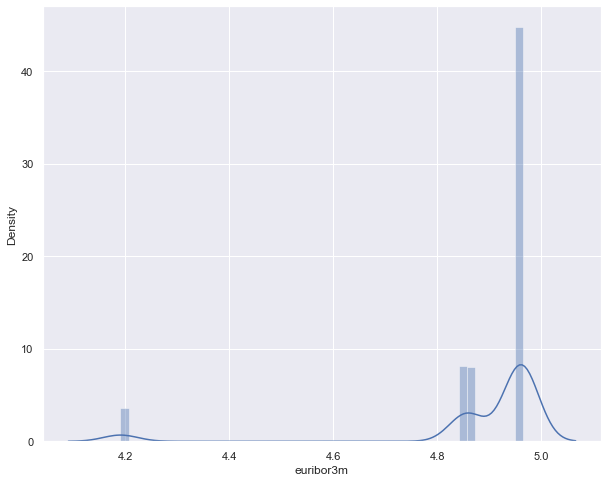

In [81]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df["euribor3m"])
plt.show()

## Numerical Feature : nr.employed
### Box plot of nr.employed

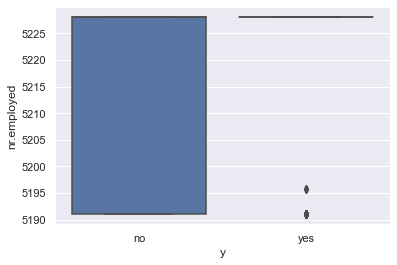

In [82]:
%matplotlib inline
sns.boxplot(data=df, x="y", y="nr.employed")
plt.show()

### distplot of nr.employed

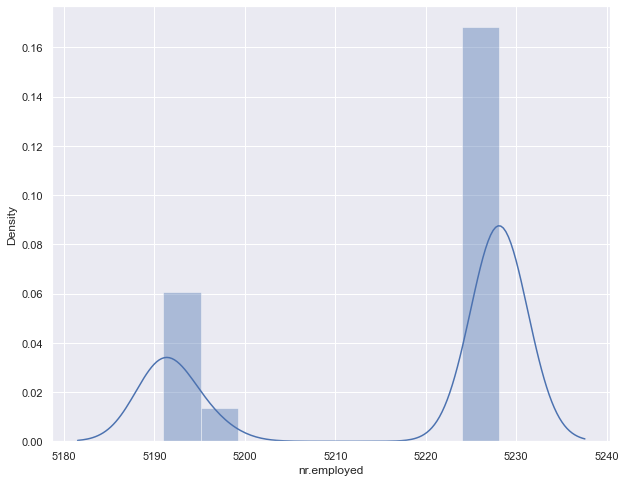

In [83]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df["nr.employed"])
plt.show()

## Correlation matrix of numerical features

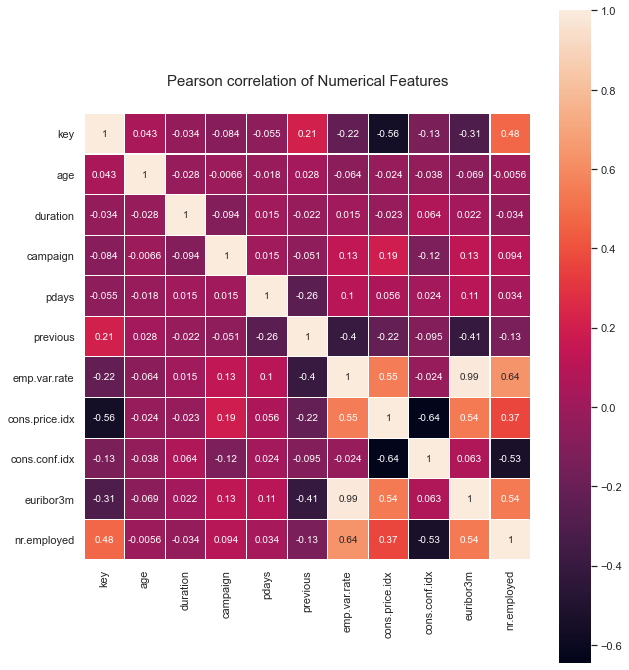

In [94]:
%matplotlib inline
corr = df.corr()                                     # Calculate correlation

f, ax = plt.subplots(figsize=(10,12))                # Figure size

cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Color map

_ = sns.heatmap(corr, cmap="rocket", square=True, ax=ax, annot=True, linewidth=0.1)     # plot a heat map

plt.title("Pearson correlation of Numerical Features", y=1.05, size=15)
plt.show()

In [149]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Training the model

In [119]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Checking for duplicate values

In [96]:
df_dup = df[df.duplicated(keep="last")]
df_dup

,key,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


As there are no duplicate values in our training data frame, we do not need to remove any values.

In [98]:
X.head()                                     # Input Features X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,45,management,married,university.degree,no,yes,no,telephone,may,tue,140,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,34,admin.,married,basic.9y,no,no,no,telephone,may,tue,175,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,47,blue-collar,married,unknown,unknown,no,no,telephone,may,tue,136,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,57,technician,married,basic.4y,unknown,no,yes,telephone,may,tue,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [100]:
X.shape                                     # Shape of X

(4170, 20)

## Training set and Cross Validation set split

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.3, random_state = 7)         # Splitting the data into traing and cross validation 
X_test = pd.read_csv('Testing_Data.csv')        # Testing dataframe of Test Input Features

## y values mapped to boolean
Replace 'no' with 0 and 'yes' with 1 in both train and cross validation output series

In [113]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)

## Encoding Categorical Variables
We do one hot encoding to deal with categorical variables before training. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data.

In [114]:
# Categorical Features boolean mask
categorical_feature_mask = X.dtypes==object

# Use above defined mask to filter categorical columns and put them into a list.
categorical_cols = X.columns[categorical_feature_mask].tolist()

### Categorical Columns

In [115]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

## One Hot Encoding

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

# Applying One hot encoding to the dataframe by creating a separate column for each of the different categories present in the series.
def add_onehot_to_dataframe(sparse, df, vectorizer, name):
    for i, col in enumerate(vectorizer.get_feature_names()):
        colname = name+"_"+col

        df[colname] = sparse[:, i].toarray().ravel().tolist()
  
    return df

def OneHotEncoder(categorical_cols, X_train, X_cv):
  
    # Iterating through all the categorical columns
    for i in categorical_cols:
        
        # Countvectorizer converts the text to lowercase and uses word-level tokenization.
        Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
        print("Encoding for feature: ", i)

        temp_cols = Vectorizer.fit_transform(X_train[i])                           # One hot encoding for training set.
        X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)       # Adding encoded features to the dataframe 

        temp_cols = Vectorizer.transform(X_cv[i])                                # One hot encoding for Test set.
        X_test = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)         # Adding encoded features to the dataframe 

One hot encoding the train, test and cross validation set.

In [117]:
# One hot encoding train test and cross validation set
OneHotEncoder(categorical_cols, X_train, X_cv)
OneHotEncoder(categorical_cols, X_train, X_test)

# Dropping the categorical columns cause we added new encoded columns for each categorical column
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols,axis=1)

# Drop the key from test set
X_test = X_test.drop('key',axis=1)

# Printing the shape of train, test and cross validation
print("Shape of train: ", X_train.shape)
print("Shape of cross validation: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (2919, 55)
Shape of cross validation:  (1251, 55)
Shape of test:  (37018, 55)


## Visualization using T-SNE Plot
The t-Distributed stochastic neighbour embedding (t-SNE) algorithm reduces the divergence between two distributions: one that measures pairwise similarities of input objects and another that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

### T-SNE Plot for Training data 

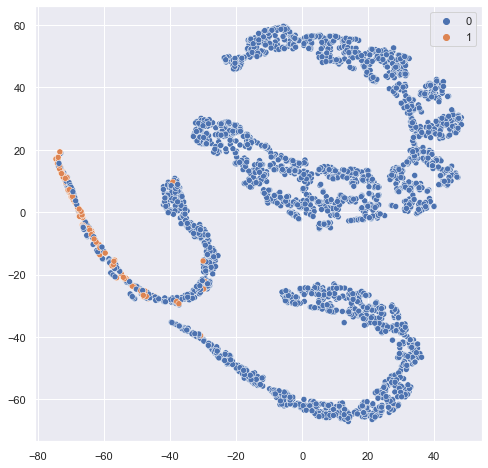

In [120]:
%matplotlib inline

# T-SNE plot for train dataset

model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))

# Scatter plot of T-SNE data
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue = y_train.values,palette="deep")

plt.show()

### T-SNE Plot for cross validation data

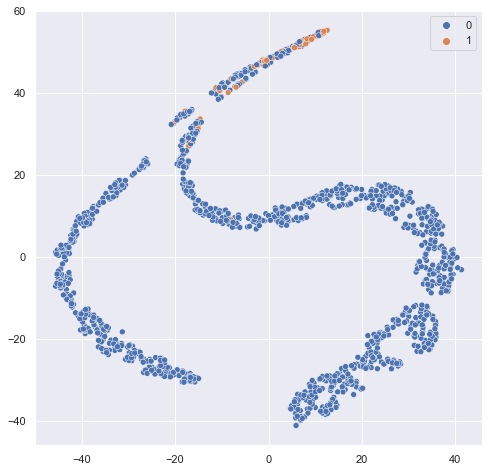

In [121]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv) 
plt.figure(figsize=(8,8))

# Scatter plot T-SNE data
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=y_cv.values, palette="deep")

plt.show()

## Evaluation Metric
As our dataset is imbalanced, with the number of 'no' values greater than number of 'yes' values, we will be using sklearn's **roc_auc_score** as the evaluation metric. 

The Receiver Operator Characteristic (ROC) curve is a probability curve that displays the TPR against the FPR at different threshold levels, thereby separating the'signal' from the 'noise.' 

The Area Under the Curve (AUC) is a summary of the ROC curve that measures a classifier's ability to distinguish between classes.

The AUC indicates how well the model distinguishes between positive and negative classes. The greater the AUC, the better.

# Approach 1
## Logistic Regression
### without hyperparameter tuning

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Model Logistic Regression with class balancing with LBFGS solver
model = LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=150)

# Fitting the model to our Training Dataset
model.fit(X_train, y_train)

# Predicting probability of our Y using the cross validation set
y_pred = model.predict_proba(X_cv)

# Printing the AUC score for our predictions
print("AUC score: ", roc_auc_score(y_cv, y_pred[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_logReg_without_ht.csv', index=False)

AUC score:  0.9560531211907359


### Logistic Regression without class balancing

In [124]:

# without class balancing
model = LogisticRegression(solver='lbfgs', max_iter=150)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_cv)

print("AUC score without class balancing: ", roc_auc_score(y_cv, y_pred[:,1]))

AUC score without class balancing:  0.9466703021748895


## K Nearest Neighbors (KNN)
An object is classified in k-NN classification by a majority vote of its neighbours, with the object being allocated to the most common class among its k closest neighbours. We tune the **number of nearest neighbors** hyperparameter for best roc_auc_score.

AUC for k =  1 is 0.7636973118624494
AUC for k =  3 is 0.8055110027587092
AUC for k =  5 is 0.8453438763071791
AUC for k =  7 is 0.9143918008596907
AUC for k =  9 is 0.9265172900494001
AUC for k =  11 is 0.9434865593122475
AUC for k =  13 is 0.9445050362481556
AUC for k =  15 is 0.946269327003272
AUC for k =  17 is 0.9550587027651248
AUC for k =  19 is 0.955844614101495
AUC for k =  21 is 0.9552992878680953
AUC for k =  23 is 0.9541685378841342
AUC for k =  25 is 0.9541524988772696
AUC for k =  27 is 0.9620998267787259
AUC for k =  29 is 0.961017193815359


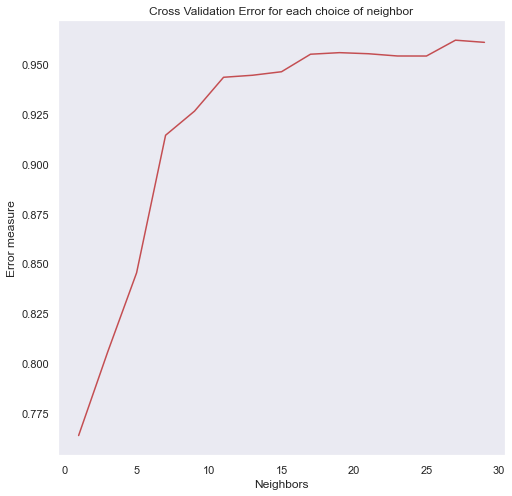

For k =  27 The train AUC is: 0.976134701434131
For k =  27 The cross validation AUC is: 0.9620998267787259


In [134]:
%matplotlib inline
# we have to tune the 'no of neighbors' hyper parameter

# alpha contains a list of 'no of neighbors'
alpha = [x for x in range(1, 31, 2)]

# list that stores roc_auc_score for each neighbor, we iterate through
cv_auc_array=[]

# for each choice of neighbor
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)                     # KNN model with n_neighbors parameter set to our current choice of neighbor
    k_cfl.fit(X_train,y_train)                                    # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")     # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                                 # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                       # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))      # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of neighbor
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

# best choice of neighbor is the one for which model gives highest score
best_alpha = np.argmax(cv_auc_array)

# Plotting error in the cross validation for each choice of neighbor
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each choice of neighbor")
plt.xlabel("Neighbors")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of neighbors that gives maximum score.
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For k = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probalibities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For k = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_knn.csv', index=False)

## Logistic Regression
### with hyperparameter tuning
We tune the **'C'** hyperparameter. A large value of C tells the model to give the training data a lot of weight and the complexity penalty a lot of weight. A low value instructs the model to prioritise this complexity penalty above fitting to the training data. A high C value suggests "trust this training data a lot," whereas a low value means "this data may not be fully reflective of real-world data, therefore don't listen to it if it tells you to make a parameter particularly large."

AUC for C =  1e-05 is 0.9633348303073073
AUC for C =  0.0001 is 0.9633508693141721
AUC for C =  0.001 is 0.963142362224931
AUC for C =  0.01 is 0.963094245204337
AUC for C =  0.1 is 0.9593411175979982
AUC for C =  1 is 0.9565824084172708
AUC for C =  10 is 0.9528132418040676
AUC for C =  100 is 0.9536151921473023
AUC for C =  1000 is 0.9530057098864437


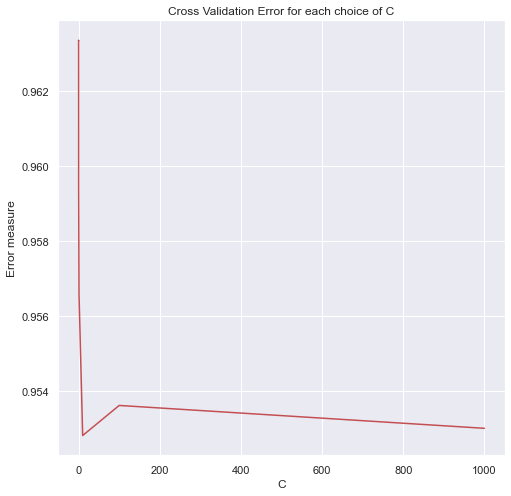

For C =  0.0001 The train AUC is: 0.9722916408033724
For C =  0.0001 The test AUC is: 0.9633508693141721


In [133]:
%matplotlib inline
# we have to tune the 'C' hyper parameter

# alpha contains a list of 'C' ranging from 10^(-5) to 10^(4)
alpha = [10 ** x for x in range(-5, 4)]

# list that stores roc_auc_score for each C value, we iterate through
cv_auc_array=[]

# for each choice of C
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced',max_iter = 1000) # Logistic Regression model with C parameter set to our current choice of C
    logisticR.fit(X_train,y_train)                                                         # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")                          # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                                                          # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                                                # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))                               # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of C
for i in range(len(cv_auc_array)):
    print ('AUC for C = ',alpha[i],'is',cv_auc_array[i])

# best choice of C is the one for which model gives highest score
best_alpha = np.argmax(cv_auc_array)

# Plotting error in the cross validation for each choice of C
plt.figure(figsize=(8,8))
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each choice of C")
plt.xlabel("C")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of C that gives maximum score.
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For C = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probalibities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For C = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_logreg_with_ht.csv', index=False)

## Linear SVM
Linear SVM is used for linearly separable data. This estimator uses stochastic gradient descent (SGD) learning to create regularised linear models: the gradient of the loss is estimated one sample at a time, and the model is updated along the way with a decreasing strength schedule (aka learning rate).

We tune the hyper parameter **alpha**, which is multiplied by the regularization term. Higher the alpha, higher the penalization or regularization.

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.5
AUC for alpha =  0.01 is 0.5
AUC for alpha =  0.1 is 0.5
AUC for alpha =  1 is 0.9633348303073073
AUC for alpha =  10 is 0.9633348303073073
AUC for alpha =  100 is 0.9633508693141721
AUC for alpha =  1000 is 0.9633348303073073


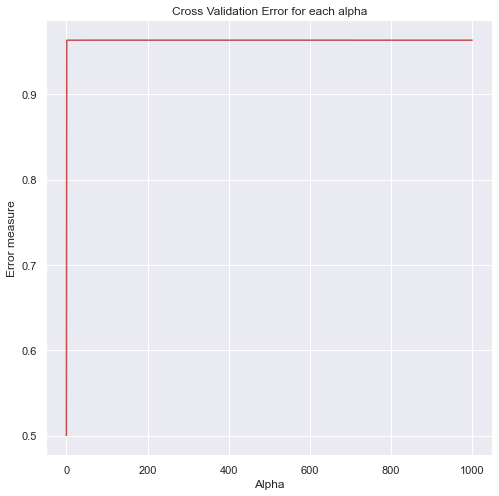

For alpha =  100 The train AUC is: 0.9720109678359574
For alpha =  100 The cross validation AUC is: 0.9633348303073073


In [136]:
%matplotlib inline
# we have to tune the 'alpha' hyper parameter

# alpha contains a list of 'alpha' ranging from 10^(-5) to 10^(4)
alpha = [10 ** x for x in range(-5, 4)]

# list that stores roc_auc_score for each C value, we iterate through
cv_auc_array=[]

# for each choice of alpha
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')    # Linear SVM model with alpha parameter set to our current choice of alpha
    linearSVM.fit(X_train,y_train)                                             # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")              # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                                              # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                                    # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))                   # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of alpha
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

# best choice of alpha is the one for which model gives highest score
best_alpha = np.argmax(cv_auc_array)
    
# Plotting error in the cross validation for each choice of alpha
plt.figure(figsize=(8,8))
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of alpha that gives maximum score.
linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probalibities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_linear_svm.csv', index=False)

## Support Vector Classification
We perform the task of classification using Support Vector Classification using RBF kernel. We tune the hyperparameter **'C'** to avoid overfitting and obtain better results.

AUC for C =  1e-05 is 0.9633669083210368
AUC for C =  0.0001 is 0.9633669083210368
AUC for C =  0.001 is 0.9633669083210368
AUC for C =  0.01 is 0.9633669083210368
AUC for C =  0.1 is 0.963350869314172
AUC for C =  1 is 0.963350869314172
AUC for C =  10 is 0.9634310643484956
AUC for C =  100 is 0.9630782061974723
AUC for C =  1000 is 0.9635593764034132


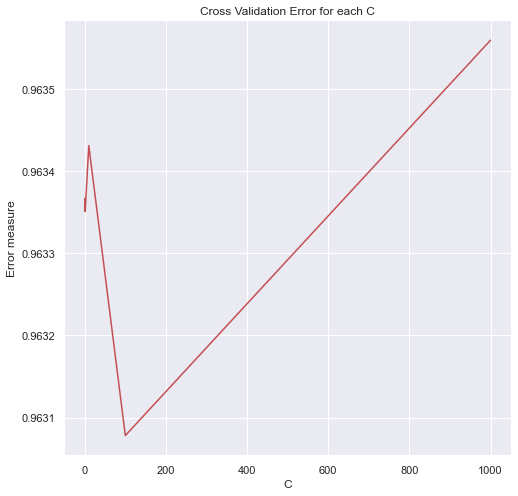

For C =  1000 The train AUC is: 0.9733117790887844
For C =  1000 The cross validation AUC is: 0.9635593764034132


In [138]:
%matplotlib inline
from sklearn.svm import SVC

# we have to tune the 'C' hyper parameter

# alpha contains a list of 'C' ranging from 10^(-5) to 10^(4)
alpha = [10 ** x for x in range(-5, 4)]

# list that stores roc_auc_score for each C value, we iterate through
cv_auc_array=[]

# for each choice of C
for i in alpha:
    SVM = SVC(C=i,class_weight='balanced')                      # SVC model with C parameter set to our current choice of C
    SVM.fit(X_train,y_train)                                    # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")     # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                               # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                     # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))  # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of C    
for i in range(len(cv_auc_array)):
    print ('AUC for C = ',alpha[i],'is',cv_auc_array[i])

# best choice of C is the one for which model gives highest score    
best_alpha = np.argmax(cv_auc_array)
    
# Plotting error in the cross validation for each choice of C
plt.figure(figsize=(8,8))
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each C")
plt.xlabel("C")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of C that gives maximum score
SVM = SVC(C=alpha[best_alpha], class_weight='balanced')
SVM.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(SVM, method="sigmoid")
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For C = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probabilities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For C = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_svc.csv', index=False)

## Random Forest Classifier
A random forest is a meta estimator that employs averaging to increase predicted accuracy and control over-fitting by fitting a number of decision tree classifiers on various sub-samples of the dataset. 

We tune the hyper parameters **n_estimators** which governs the number of trees in the forest.

AUC for number of estimators =  10 is 0.8970696734458202
AUC for number of estimators =  50 is 0.9188586642715083
AUC for number of estimators =  100 is 0.9199011997177134
AUC for number of estimators =  500 is 0.9264290755116442
AUC for number of estimators =  1000 is 0.9285783024315135
AUC for number of estimators =  2000 is 0.931176621543594
AUC for number of estimators =  3000 is 0.9314974016808879


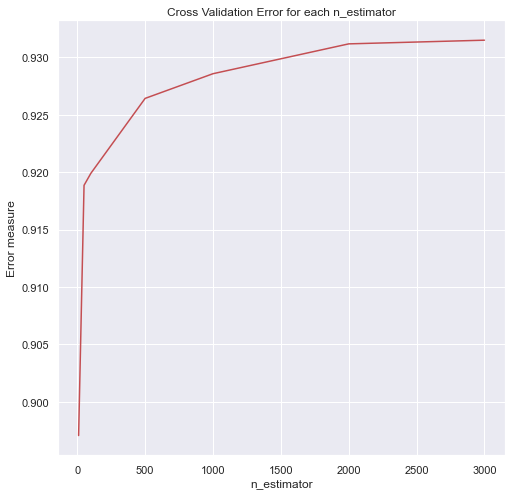

For n_estimator =  3000 The train AUC is: 1.0
For n_estimator =  3000 The cross validation AUC is: 0.9314974016808879


In [141]:
%matplotlib inline

# we have to tune the 'n_estimators' hyper parameter

# alpha contains a list of 'n_estimators' 
alpha=[10,50,100,500,1000,2000,3000]

# list that stores roc_auc_score for each n_estimators value, we iterate through
cv_auc_array=[]

# for each choice of n_estimators
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)        # Random Forest Classification model with n_estimators parameter set to our current choice of n_estimators
    r_cfl.fit(X_train,y_train)                                                    # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")                     # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                                                 # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                                       # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))                      # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of n_estimators      
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

# best choice of n_estimators is the one for which model gives highest score 
best_alpha = np.argmax(cv_auc_array)

# Plotting error in the cross validation for each choice of n_estimator
plt.figure(figsize=(8,8))
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each n_estimator")
plt.xlabel("n_estimator")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of n_estimator that gives maximum score
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")                     
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For n_estimator = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probabilities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For n_estimator = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_random_forest.csv', index=False)

## XgBoost Classifier
Gradient boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

We tune the hyper parameter **n_estimators**, which indicates the number of boosting stages to perform.

[18:26:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

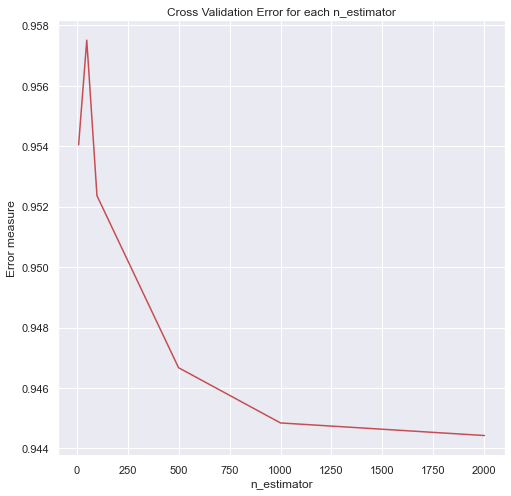

[18:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [150]:
%matplotlib inline

# we have to tune the 'n_estimators' hyper parameter

# alpha contains a list of 'n_estimators' 
alpha=[10,50,100,500,1000,2000]

# list that stores roc_auc_score for each n_estimators value, we iterate through
cv_auc_array=[]

# for each choice of n_estimators
for i in alpha:
    x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="hist")                 # Xgboost Classification model with n_estimators parameter set to our current choice of n_estimators
    x_cfl.fit(X_train,y_train)                                                    # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")                     # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                                                 # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                                       # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))                      # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of n_estimators      
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

# best choice of n_estimators is the one for which model gives highest score 
best_alpha = np.argmax(cv_auc_array)

# Plotting error in the cross validation for each choice of n_estimator
plt.figure(figsize=(8,8))
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each n_estimator")
plt.xlabel("n_estimator")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of n_estimator that gives maximum score
x_cfl = XGBClassifier(n_estimators=alpha[best_alpha], tree_method="hist")
x_cfl.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")                     
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For n_estimator = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probabilities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For n_estimator = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_xgboost.csv', index=False)


## XgBoost with RandomizedSearchCV
RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. We perform **hyperparameter optimization** by objectively searching different values for model hyperparameters and choose a subset that results in a model that achieves the best performance on the given dataset.

In [143]:
x_cfl=XGBClassifier(tree_method='hist', max_bin=16)       # XGB Classification model

# hyperparameters over which we perform randomized search and choose optimal value for each.
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=10, scoring='roc_auc') # RandomizedSearchCV model
random_cfl.fit(X_train, y_train) # Fitting the training data 
print (random_cfl.best_params_) # printing the dictionary containg best params used for training and predictions.

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.1
[15:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/10; 1/20] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.1; total time=   2.6s
[CV 2/10; 1/20] START colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.1
[15:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd lik

In [144]:
# We use the above dictionary params in our model
x_cfl=XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.05,
                    colsample_bytree=0.5,subsample=0.1,tree_method='hist', max_bin=16)

# Fit the training set
x_cfl.fit(X_train,y_train,verbose=True)

# Caliberate the training data
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

# Predict probabilities for training data and print score
predict_y = sig_clf.predict_proba(X_train)
print ("The train AUC is:",roc_auc_score(y_train, predict_y[:, 1]))

# Predict probabilities for cross validation data and print score
predict_y = sig_clf.predict_proba(X_cv)
print("The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:, 1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_xgboost_with_randomizedSearch.csv', index=False)

[15:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## LGBM Classifier
The primary benefit of the LightGBM is the changes to the training algorithm that make the process dramatically faster, and in many cases, result in a more effective model.
We tune the hyper parameter **n_estimator** which indicates the number of boosted trees to fit.

AUC for number of estimators =  10 is 0.9498059280169372
AUC for number of estimators =  50 is 0.9579457240007698
AUC for number of estimators =  100 is 0.956935266568294
AUC for number of estimators =  500 is 0.9438634759735678
AUC for number of estimators =  1000 is 0.9423878873420157
AUC for number of estimators =  2000 is 0.9418265221017514


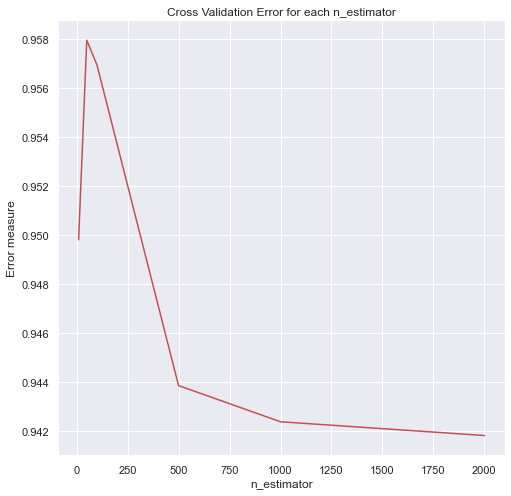

For n_estimator =  50 The train AUC is: 0.999935229315212
For n_estimator =  50 The cross validation AUC is: 0.9579457240007698


In [152]:
from lightgbm import LGBMClassifier
%matplotlib inline

# we have to tune the 'n_estimators' hyper parameter

# alpha contains a list of 'n_estimators' 
alpha=[10,50,100,500,1000,2000]

# list that stores roc_auc_score for each n_estimators value, we iterate through
cv_auc_array=[]

# for each choice of n_estimators
for i in alpha:
    lgbm_cfl=LGBMClassifier(n_estimators=i)                                         # LGBM Classification model with n_estimators parameter set to our current choice of n_estimators
    lgbm_cfl.fit(X_train,y_train)                                                    # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(lgbm_cfl, method="sigmoid")                     # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                                                    # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                                          # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))                         # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of n_estimators      
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

# best choice of n_estimators is the one for which model gives highest score 
best_alpha = np.argmax(cv_auc_array)

# Plotting error in the cross validation for each choice of n_estimator
plt.figure(figsize=(8,8))
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each n_estimator")
plt.xlabel("n_estimator")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of n_estimator that gives maximum score
lgbm_cfl = LGBMClassifier(n_estimators=alpha[best_alpha])
lgbm_cfl.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(lgbm_cfl, method="sigmoid")                     
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For n_estimator = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probabilities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For n_estimator = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_lgbmboost.csv', index=False)


In [153]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


## CatBoost Classifier
We tune the hyperparameter **n_estimators**.

AUC for number of estimators =  10 is 0.9502630397125811
AUC for number of estimators =  50 is 0.9519150574196447
AUC for number of estimators =  100 is 0.9569994225957529
AUC for number of estimators =  500 is 0.9567427984859178
AUC for number of estimators =  1000 is 0.9562937062937062
AUC for number of estimators =  2000 is 0.9577211779046642


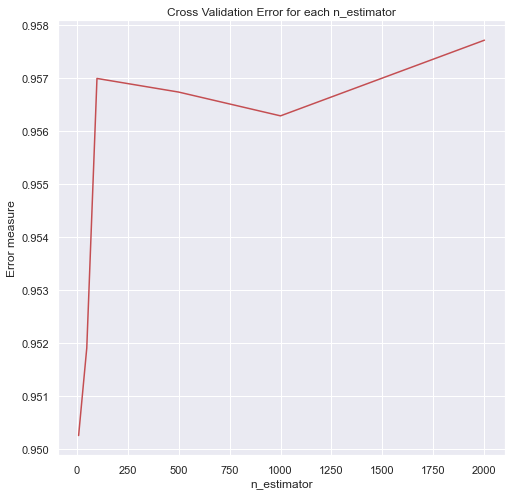

Learning rate set to 0.008621
0:	learn: 0.6744884	total: 3.59ms	remaining: 7.18s
1:	learn: 0.6531080	total: 7.98ms	remaining: 7.97s
2:	learn: 0.6345655	total: 31.6ms	remaining: 21.1s
3:	learn: 0.6144181	total: 34.9ms	remaining: 17.4s
4:	learn: 0.5939205	total: 38.4ms	remaining: 15.3s
5:	learn: 0.5755495	total: 41.8ms	remaining: 13.9s
6:	learn: 0.5579832	total: 45.2ms	remaining: 12.9s
7:	learn: 0.5462595	total: 47.6ms	remaining: 11.8s
8:	learn: 0.5311728	total: 50.7ms	remaining: 11.2s
9:	learn: 0.5170781	total: 54ms	remaining: 10.8s
10:	learn: 0.5038889	total: 57.3ms	remaining: 10.4s
11:	learn: 0.4937075	total: 61ms	remaining: 10.1s
12:	learn: 0.4820338	total: 64.8ms	remaining: 9.9s
13:	learn: 0.4693309	total: 68.3ms	remaining: 9.69s
14:	learn: 0.4557308	total: 71.7ms	remaining: 9.49s
15:	learn: 0.4453145	total: 74.1ms	remaining: 9.19s
16:	learn: 0.4325430	total: 77.9ms	remaining: 9.09s
17:	learn: 0.4214748	total: 81.3ms	remaining: 8.95s
18:	learn: 0.4140068	total: 85.1ms	remaining: 8.8

In [154]:
from catboost import CatBoostClassifier
%matplotlib inline

# we have to tune the 'n_estimators' hyper parameter

# alpha contains a list of 'n_estimators' 
alpha=[10,50,100,500,1000,2000]

# list that stores roc_auc_score for each n_estimators value, we iterate through
cv_auc_array=[]

# for each choice of n_estimators
for i in alpha:
    cb_cfl=CatBoostClassifier(verbose=0,n_estimators=i)                            # Catboost Classification model with n_estimators parameter set to our current choice of n_estimators
    cb_cfl.fit(X_train,y_train)                                                    # fitting the training set with the model
    sig_clf = CalibratedClassifierCV(cb_cfl, method="sigmoid")                     # Already fitted classifiers caliberated using CaliberatedClassifier by using sigmoid method for caliberation
    sig_clf.fit(X_train, y_train)                                                  # Fitting the training set with caliberated classifier model
    predict_y = sig_clf.predict_proba(X_cv)                                        # predicting the probabities for cross validation set
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))                       # appending the roc_auc_score of current model into our list

# Printing the ROC_AUC score for each choice of n_estimators      
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

# best choice of n_estimators is the one for which model gives highest score 
best_alpha = np.argmax(cv_auc_array)

# Plotting error in the cross validation for each choice of n_estimator
plt.figure(figsize=(8,8))
plt.plot(alpha, cv_auc_array,c='r')
plt.title("Cross Validation Error for each n_estimator")
plt.xlabel("n_estimator")
plt.ylabel("Error measure")
plt.show()

# Training the dataset by using the best choice of n_estimator that gives maximum score
cb_cfl = CatBoostClassifier(n_estimators=alpha[best_alpha])
cb_cfl.fit(X_train,y_train)

# Caliberating the already trained dataset
sig_clf = CalibratedClassifierCV(cb_cfl, method="sigmoid")                     
sig_clf.fit(X_train, y_train)

# predicting the y probabilities for train and printing score
predict_y = sig_clf.predict_proba(X_train)
print ('For n_estimator = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))

# predicting the y probabilities for cross validation and printing score
predict_y = sig_clf.predict_proba(X_cv)
print('For n_estimator = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))

# Predicting output values of Test using our trained model
y_out = model.predict(X_test)

# Converting numpy array to pandas Series
y_o = pd.Series(y_out)

# Replace 1 with 'yes' and 0 with 'no'
y_o.replace({1:'yes',0:'no'},inplace=True)

# Making submission data frame using key and predicted output
my_submission = pd.DataFrame({'key': key_series, 'y': y_o})

# Storing the submission in a csv file.
my_submission.to_csv('submission_catboost.csv', index=False)
